## Goodreads Book Data

### Problem Statement:
- Reading is my biggest hobby. I am interested in knowing which genres tend to have the highest ratings, whether male or female authors usually write specific types of books, what counties they are from, etc. One of my goals is to create a recommended book list for each genre - the must reads based on ratings. I may use a second dataset to match book titles with descriptions that I already found depending on the depth/time of my analysis.

### Data Source Location:
- The data was found on Kaggle at the following address:
    - https://www.kaggle.com/choobani/goodread-authors?select=final_dataset.csv
	- Secondary dataset that pulls book descriptions:
		- https://www.kaggle.com/meetnaren/goodreads-best-books

### Data Acquisition:
- Data was acquired from a google search specifically looking for data sets that include author gender and country of origin. I tried to find something that also included a book description so I could scrape for keywords relating to genre, but I could not find a dataset including that and gender/country. I settled for a dataset that contained gender/country/genre and might include a second dataset to match book title to descriptions. This data was also found on kaggle. 

### Description of Available Data:
- This data is 209517 rows x 20 columns. The columns include authorid, name, workcount, fan_count, gender, image_url,	about, born, died, influence	average_rate, rating_count, review_count, website, twitter, genre, original_hometown, country, latitude, and longitude. Several of the columns have a significant number of null-values, though not in the columns of most interest to me. The first dataset is 115MB and the potential second is 57.7MB. I know that this is technically larger than the limit provided in the project description. I believe part of this is due to some columns that are not relevent to my analysis and can be dropped. The main one is a column containing links to images of the authors. Without that column the dataset is less than 100MB. I can remove this prior to uploading or after uploading to Jupyter depending on which method you would prefer. 

### Data Usage: 
- This dataset was created using scraped data from Goodreads and was last updated 10 months ago. It was uploaded to kaggle for use by anyone who is interested. 

### Documentation: 
- From what I can tell there are simple visualizations created from the data but no documented processes for EDA, visualization, or analysis. 

### Hypotheses/Questions:
- Men write more science fiction/fantasy than women.
	- what genre do women contribute to the most?
- Women have higher "follower" count
- What genres have the most submissions?
- Which genres have the highest reviews/number of reviews?
- Do men or women authors receive higher reviews?
- Can books be classified by select words in the blurbs on the back?

### Code Sources
- https://stackoverflow.com/questions/54135085/create-new-column-based-on-string
- https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
- https://stackoverflow.com/questions/20076195/what-is-the-most-efficient-way-of-counting-occurrences-in-pandas
- https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
- https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
- https://stackoverflow.com/questions/52135315/set-axis-maximum-with-seaborn-distplot/52135483
- https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
- https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot
- https://stackoverflow.com/questions/52132970/pandas-how-to-plot-the-pie-diagram-for-the-movie-counts-versus-genre-of-imdb-mo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2.4)
pd.options.mode.chained_assignment = None

In [2]:
# load csv
df = pd.read_csv("final_dataset.csv")

In [3]:
# basic info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209517 entries, 0 to 209516
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   authorid           209517 non-null  int64  
 1   name               209517 non-null  object 
 2   workcount          209517 non-null  int64  
 3   fan_count          209517 non-null  int64  
 4   gender             209517 non-null  object 
 5   image_url          209517 non-null  object 
 6   about              86724 non-null   object 
 7   born               31230 non-null   object 
 8   died               12488 non-null   object 
 9   influence          7882 non-null    object 
 10  average_rate       209517 non-null  float64
 11  rating_count       209517 non-null  int64  
 12  review_count       209517 non-null  int64  
 13  website            58320 non-null   object 
 14  twitter            35122 non-null   object 
 15  genre              73983 non-null   object 
 16  or

In [4]:
df.describe()

,authorid,workcount,fan_count,average_rate,rating_count,review_count,latitude,longitude
count,2.095170e+05,2.095170e+05,209517.000000,209517.000000,2.095170e+05,209517.000000,44369.000000,44369.000000
mean,4.694173e+06,3.562482e+01,166.382189,3.861705,7.236301e+03,514.567171,36.620498,-29.873262
std,5.404024e+06,2.895527e+03,3221.995738,0.459039,1.088757e+05,4541.834223,20.113294,68.471148
min,4.000000e+00,0.000000e+00,-18.000000,0.000000,0.000000e+00,0.000000,-85.900000,-176.640280
25%,3.098670e+05,3.000000e+00,1.000000,3.670000,6.500000e+01,8.000000,34.272230,-83.000180
50%,2.892154e+06,8.000000e+00,6.000000,3.900000,2.970000e+02,37.000000,40.768430,-61.666670
75%,7.074207e+06,2.100000e+01,33.000000,4.110000,1.308000e+03,162.000000,47.753550,10.925390
max,2.017882e+07,1.278643e+06,709826.000000,8.070000,2.451111e+07,579250.000000,80.683330,178.831420


In [5]:
df.head()

,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,average_rate,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude
0,8409092,Jason Wallace,2,13,male,https://images.gr-assets.com/authors/148926684...,Jason Wallace is related to Tolkien and a desc...,NaN,NaN,NaN,3.74,1028,175,NaN,NaN,NaN,Cheltenham,United Kingdom,51.90006,-2.07972
1,5796406,Rosan Hollak,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.73,15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8421525,Nanna Foss,6,156,female,https://images.gr-assets.com/authors/140908587...,Danish YA writer. <br /><br />I make up storie...,NaN,NaN,NaN,4.35,1172,205,http://www.nannafoss.dk,NaN,"fantasy,fiction,paranormal",NaN,NaN,NaN,NaN
3,158146,Terri Savelle Foy,23,125,female,https://images.gr-assets.com/authors/147569460...,"For years, Terri Savelle Foy’s life was averag...",NaN,NaN,NaN,4.56,1054,151,http://www.terri.com,terrisavellefoy,"religion and spirituality,self help,spirituality",NaN,NaN,NaN,NaN
4,15340731,Vishwas Nangare Patil,1,127,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,4.15,725,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# There are a lot of columns not needed for this analysis so they will be dropped for clarity
df1 = df.drop(columns=['authorid', 'image_url', 'died', 'influence', 'website', 'twitter', 'original_hometown', 'latitude', 'longitude'])

In [7]:
df1.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
0,Jason Wallace,2,13,male,Jason Wallace is related to Tolkien and a desc...,NaN,3.74,1028,175,NaN,United Kingdom
1,Rosan Hollak,4,0,unknown,NaN,NaN,3.73,15,1,NaN,NaN
2,Nanna Foss,6,156,female,Danish YA writer. <br /><br />I make up storie...,NaN,4.35,1172,205,"fantasy,fiction,paranormal",NaN
3,Terri Savelle Foy,23,125,female,"For years, Terri Savelle Foy’s life was averag...",NaN,4.56,1054,151,"religion and spirituality,self help,spirituality",NaN
4,Vishwas Nangare Patil,1,127,unknown,NaN,NaN,4.15,725,43,NaN,NaN


In [8]:
# droping null values in the genre category because this is mainly about genre
df2 = df1.dropna(subset=['genre'])

In [9]:
df2.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
2,Nanna Foss,6,156,female,Danish YA writer. <br /><br />I make up storie...,NaN,4.35,1172,205,"fantasy,fiction,paranormal",NaN
3,Terri Savelle Foy,23,125,female,"For years, Terri Savelle Foy’s life was averag...",NaN,4.56,1054,151,"religion and spirituality,self help,spirituality",NaN
8,Phil Hamman,6,6,male,Phil Hamman is the co-author of the #1 nationa...,1958-03-07,3.83,1340,193,"biographies and memoirs,history,non fiction",NaN
13,"John ""Red"" Shea",4,3,male,"John ""Red"" Shea, 40, was a top lieutenant in t...",1965-08-12,3.55,514,56,biographies and memoirs,United States
14,Mary Kelly,12,1,unknown,Mary Kelly was an English crime writer best kn...,NaN,3.18,216,51,"crime,mystery and thrillers",NaN


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73983 entries, 2 to 209516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          73983 non-null  object 
 1   workcount     73983 non-null  int64  
 2   fan_count     73983 non-null  int64  
 3   gender        73983 non-null  object 
 4   about         65026 non-null  object 
 5   born          23503 non-null  object 
 6   average_rate  73983 non-null  float64
 7   rating_count  73983 non-null  int64  
 8   review_count  73983 non-null  int64  
 9   genre         73983 non-null  object 
 10  country       35878 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 6.8+ MB


## Country Analysis

In [11]:
# drop nulls from country for analysis. Not having these does not decrease value of data 
df_country = df1.dropna(subset=['country'])

In [12]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44599 entries, 0 to 209515
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          44599 non-null  object 
 1   workcount     44599 non-null  int64  
 2   fan_count     44599 non-null  int64  
 3   gender        44599 non-null  object 
 4   about         39565 non-null  object 
 5   born          22979 non-null  object 
 6   average_rate  44599 non-null  float64
 7   rating_count  44599 non-null  int64  
 8   review_count  44599 non-null  int64  
 9   genre         35878 non-null  object 
 10  country       44599 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.1+ MB


In [13]:
df_country.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
0,Jason Wallace,2,13,male,Jason Wallace is related to Tolkien and a desc...,NaN,3.74,1028,175,NaN,United Kingdom
13,"John ""Red"" Shea",4,3,male,"John ""Red"" Shea, 40, was a top lieutenant in t...",1965-08-12,3.55,514,56,biographies and memoirs,United States
15,Ricardo Ferrari,31,3,male,NaN,1957-01-18,3.68,345,31,comics,Argentina
17,Lucie Dufresne,17,0,female,Lucie Dufresne was born in 1951 in Trois-Riviè...,NaN,3.79,305,30,NaN,Canada
18,Tomás Carrasquilla,27,12,male,NaN,1858-01-17,3.94,320,29,NaN,Colombia


In [14]:
# count the occurances of each country, create dataframe of top 20, rename columns
country_count  = df_country['country'].value_counts()
country_count = pd.DataFrame(country_count[:20]).reset_index()
country_count.columns = ['country', 'workcount']

In [15]:
country_count

,country,workcount
0,United States,19444
1,United Kingdom,5147
2,Canada,1528
3,France,1104
4,Germany,1028
5,Australia,980
6,Italy,854
7,Spain,850
8,India,752
9,Japan,615


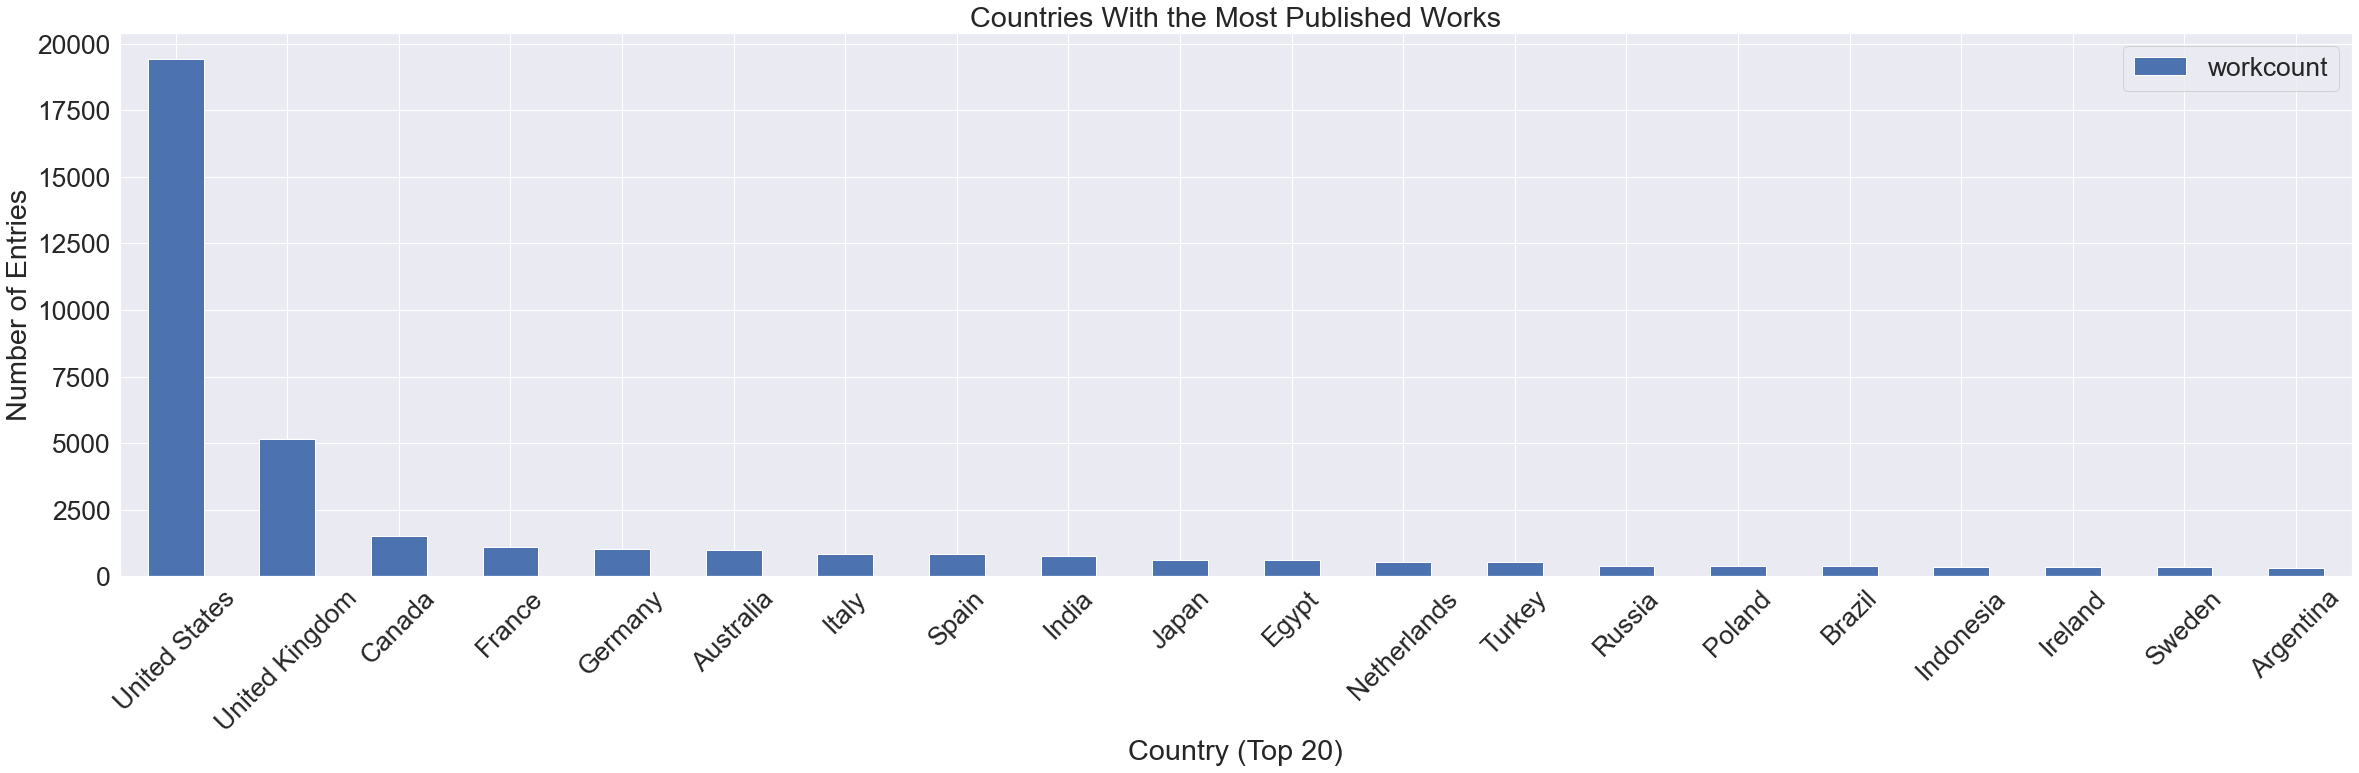

In [16]:
# plot country and count
country_count.plot(kind='bar', title='Countries With the Most Published Works', x='country', y='workcount', figsize=(40,10)) 
plt.ylabel('Number of Entries')
plt.xlabel('Country (Top 20)')
plt.xticks(rotation=45)
plt.show()

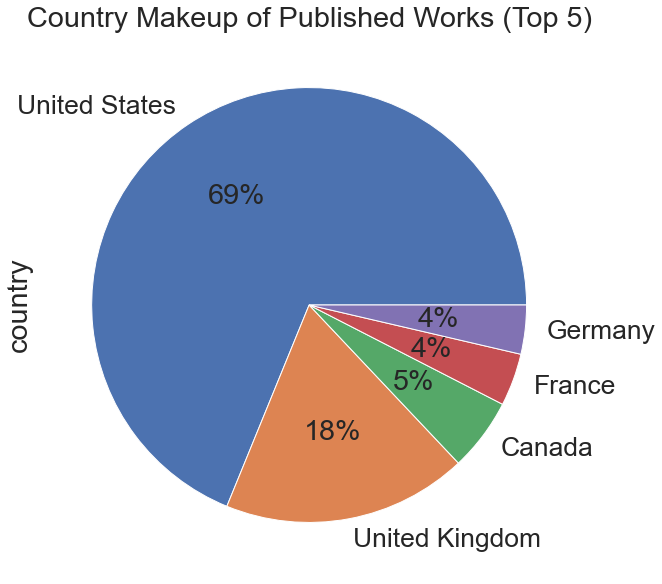

In [17]:
# plots pie chart containing top 5 percentage of total works per country (including those dropped for genre null values)
df1.country.value_counts().iloc[:5].plot(kind='pie', autopct='%1.0f%%', figsize=(10,10), title="Country Makeup of Published Works (Top 5)")
plt.show()

In [18]:
# create new df that sorts by work count
df3 = df2.sort_values('workcount', ascending=False)
df3.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
197528,Books LLC,22764,149,unknown,Books LLC is a reprint publisher of nonfiction...,NaN,4.25,29095,1462,"fiction,literature,non fiction",NaN
197731,Walt Disney Company,17607,1970,unknown,<i>Note: The decision was made to consolidate ...,NaN,4.23,499566,18645,"children,comics,graphic novels",NaN
149202,National Research Council,6330,21,unknown,The National Research Council (NRC) functions ...,NaN,3.80,1741,150,science,NaN
200850,William Shakespeare,5204,35178,male,William Shakespeare (baptised 26 April 1564) w...,NaN,3.87,6066878,110417,"classics,poetry,theatre",United Kingdom
107480,Hal Leonard Publishing Company,4963,81,unknown,Hal Leonard is a music print publisher. Musica...,NaN,4.39,45109,867,music,NaN


In [19]:
# create new df sorting by review count
df4 = df2.sort_values('review_count', ascending=False)
df4.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
200964,J.K. Rowling,242,209174,female,"See also: <a href=""https://www.goodreads.com/a...",1965-07-31,4.46,24511114,579250,"fantasy,fiction,young adult",United Kingdom
200864,Stephen King,1653,709826,male,Stephen Edwin King was born the second son of ...,NaN,4.04,13815580,541869,"fiction,horror,literature,mystery and thrillers",United States
200859,Suzanne Collins,32,81311,female,<i>Librarian Note: There is more than one auth...,1962-08-11,4.26,11167421,383990,"fantasy,fiction,young adult",United States
201253,Cassandra Clare,191,210407,female,Hello Goodreadsers. Here's my official bio:<br...,NaN,4.26,6590561,371893,"fantasy,fiction",Iran
200959,John Green,43,271065,unknown,<i>Librarian Note: There is more than one auth...,NaN,4.05,6456649,344608,"fiction,literature,romance,young adult",United States


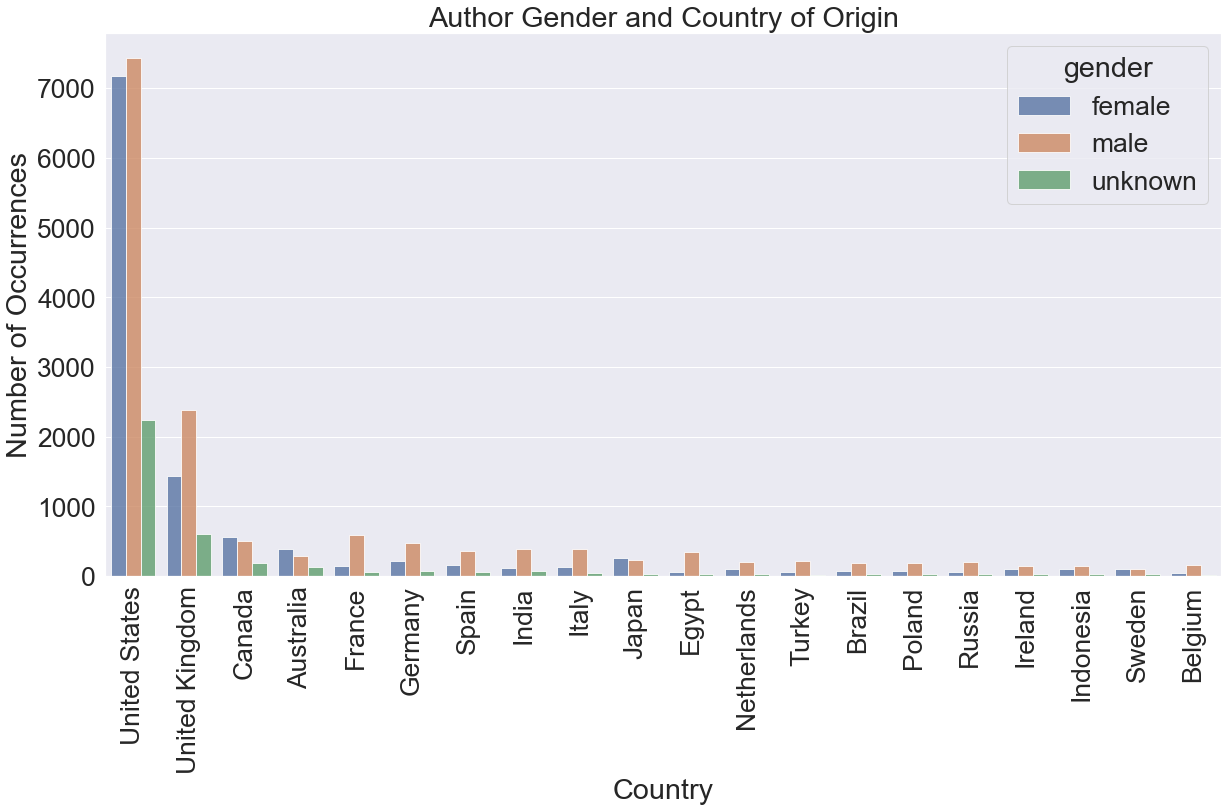

In [20]:
# plot number of authors per top 20 countries by gender
plt.figure(figsize=(20,10))
sns.countplot(data=df2,x='country',hue='gender', alpha=0.8, order=df2.country.value_counts().iloc[:20].index)
plt.title('Author Gender and Country of Origin')
plt.ylabel('Number of Occurrences')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

### Conclusions: 
- from this data, the United States, United Kingdom, Canada, Australia, and France have the most published works
- The United States makes up 60% of the published works
- The United Kingdom makes up 18% of the published works
- Canada Makes Up 5% of the published works
- France and Germany each make up 4% of the published works
- Of the top 20 countries, only Canada, Australia and Japan have more works by female authors

## Genre Analysis:

In [21]:
# creates list of most common genres starting with most common, maps the list to the genre column and splits 
# into new column containing one value with main genre
values = ['science fiction', 'fantasy', 'fiction', 'classics', 'chick lit', 'beer', 'horror', 'home', 
          'juvenile', 'feminism', 'engineering', 'origami', 'nursing', 'games', 'knitting', 'ethics', 
          'anatomy', 'journalism', 'illustration', 'plays', 'theatre', 'regency', 'plays', 'computer gaming',
          'construction', 'style guide', 'zoroastrianism', 'card games', 'web development', 
          'personal development', 'innovation', 'adaptation', 'stage plays', 'historical', 'psychology', 
          'manga', 'literature', 'cooking', 'disambiguation', 'philosophy', 'sex', 'culture', 'social studies', 
          'reference', 'cookbooks', 'technology', 'gender', 'graphic novels', 'programming', 'economy', 
          'music', 'sport', 'foreign policy', 'language', 'contemporary', 'dystopian', 'short stories', 
          'criticism', 'investing', 'geology', 'entertainment', 'play', 'pets', 'western', 'suspense', 
          'translation', 'animal', 'economics', 'health', 'architecture', 'archaeology', 'astrology', 
          'interior design', 'linguistics', 'folklore', 'political', 'nature', 'nonfiction', 'biographies', 
          'crime', 'spirituality', 'mystery', 'comics', 'art', 'young adult', 'history', 'comedy', 
          'paranormal', 'romance', 'children', 'poetry', 'business', 'non fiction', 'crafts', 'travel', 
          'computers', 'self help', 'science', 'religious', 'chronicles', 'ufology', 'photography', 
          'mathematics', 'hybrids', 'russia', 'occult', 'physics', 'terrorism', 'parenting', 'gardening', 
          'medicine', 'sociology', 'logic', 'psychotherapy', 'biology', 'zoology', 'theater', 'civil rights', 
          'current events', 'domestic abuse', 'international development', 'marketing', 'pop punk', 'law', 
          'survivalism', 'wine', 'prose', 'metaphysical', 'marx', 'etiquette', 'drama', 'sql', '3d', 'columns',
          'realism', 'movies', 'botony', 'horses', 'news', 'firearms', 'biblical geography', 'film', 'maps', 
          'symbolism', 'botany', 'land reform', 'land reform', 'military', 'relationships', 'international studies',
          'theonomy', 'cyberpunk', 'anthropology', 'existentialism', 'fashion', 'life', 'objectivism', 
          'hagiography', 'paracord', 'cross dressing', 'play', 'self defense', 'nutrition', 'chess', 'outdoors']

conditions = list(map(df2['genre'].str.contains, values))

df2['split_genres'] = np.select(conditions, values, 'other')

df2.head(10)

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country,split_genres
2,Nanna Foss,6,156,female,Danish YA writer. <br /><br />I make up storie...,NaN,4.35,1172,205,"fantasy,fiction,paranormal",NaN,fantasy
3,Terri Savelle Foy,23,125,female,"For years, Terri Savelle Foy’s life was averag...",NaN,4.56,1054,151,"religion and spirituality,self help,spirituality",NaN,spirituality
8,Phil Hamman,6,6,male,Phil Hamman is the co-author of the #1 nationa...,1958-03-07,3.83,1340,193,"biographies and memoirs,history,non fiction",NaN,fiction
13,"John ""Red"" Shea",4,3,male,"John ""Red"" Shea, 40, was a top lieutenant in t...",1965-08-12,3.55,514,56,biographies and memoirs,United States,biographies
14,Mary Kelly,12,1,unknown,Mary Kelly was an English crime writer best kn...,NaN,3.18,216,51,"crime,mystery and thrillers",NaN,crime
15,Ricardo Ferrari,31,3,male,NaN,1957-01-18,3.68,345,31,comics,Argentina,comics
23,Asuka Lionera,25,24,unknown,NaN,NaN,4.14,608,217,"chick lit,fantasy,young adult",NaN,fantasy
25,Maja Ilisch,6,6,female,"Maja Ilisch, geboren 1975 in Dortmund, studier...",NaN,3.52,168,73,"fantasy,horror,sex",Germany,fantasy
29,Marliese Arold,149,20,female,NaN,NaN,3.54,1663,107,"children,fantasy,fiction,young adult",Germany,fantasy
34,Matthew D. Jordan,4,9,male,"Author of TINCTURE (<a target=""_blank"" href=""h...",NaN,4.09,135,27,"comedy,fiction",United States,fiction


In [22]:
# creates new dataframe with just the genres - used to develop most common genre list above 
#df_genres = pd.DataFrame(df2.split_genres.unique())
#df_genres.columns = ['genre_list']

In [23]:
#df_genres

In [24]:
# used to narrow down genres until they got super obscure
# df_genres[df_genres['split_genres'].str.match('other')]

In [25]:
# displays to 20 genres and the number of works in each 
df2.split_genres.value_counts().iloc[:20]

fiction           26437
fantasy            8994
mystery            3171
history            2940
biographies        2939
spirituality       2526
contemporary       2484
children           2120
romance            1914
young adult        1743
sex                1555
suspense           1467
poetry             1245
philosophy         1228
graphic novels     1141
horror              915
crime               861
chick lit           812
psychology          694
art                 621
Name: split_genres, dtype: int64

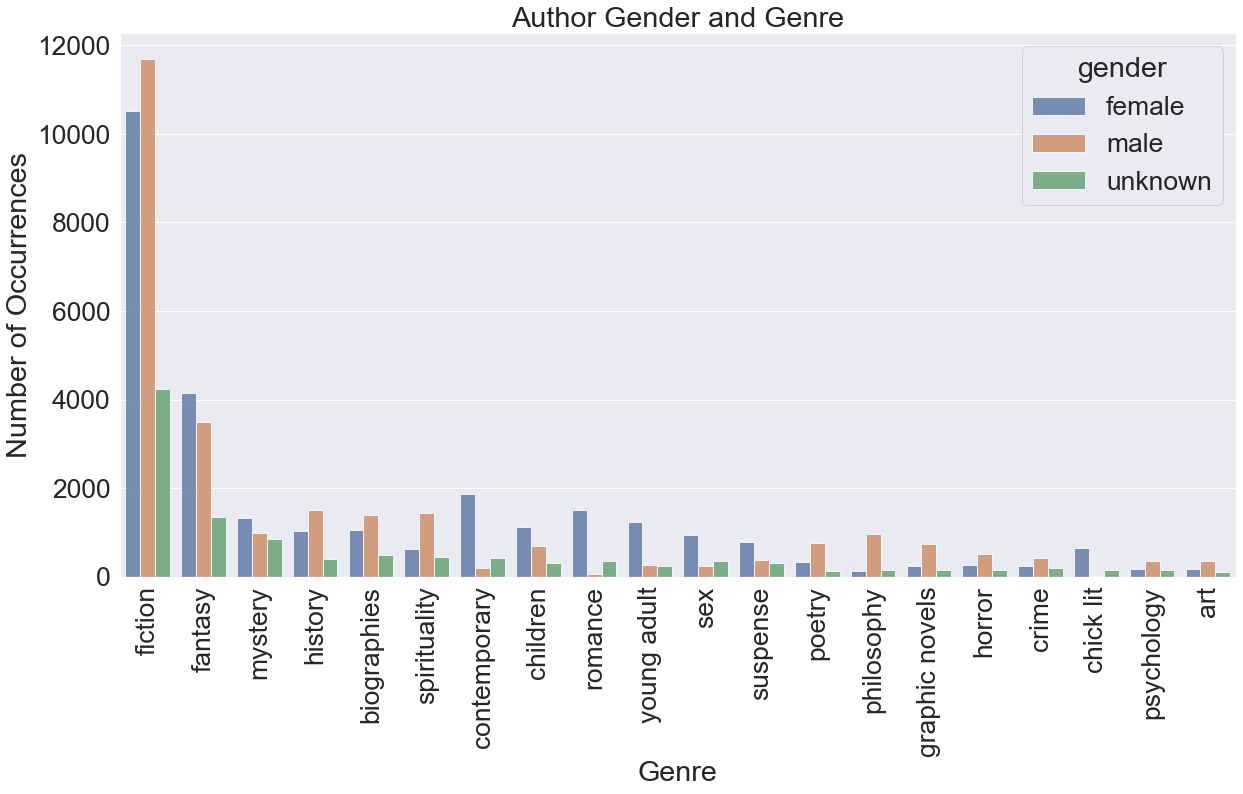

In [26]:
# plots top 20 genres by gender
plt.figure(figsize=(20,10))
sns.countplot(data=df2,x='split_genres',hue='gender', alpha=0.8, order=df2.split_genres.value_counts().iloc[:20].index)
plt.title('Author Gender and Genre')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

In [27]:
# creates new dataframe that counts the occurances of each genre
genre_count = pd.DataFrame(df2['split_genres'].value_counts().reset_index())
genre_count = genre_count.rename({'index': 'genre', 'split_genres': 'count'}, axis=1)
genre_count.head(10)

,genre,count
0,fiction,26437
1,fantasy,8994
2,mystery,3171
3,history,2940
4,biographies,2939
5,spirituality,2526
6,contemporary,2484
7,children,2120
8,romance,1914
9,young adult,1743


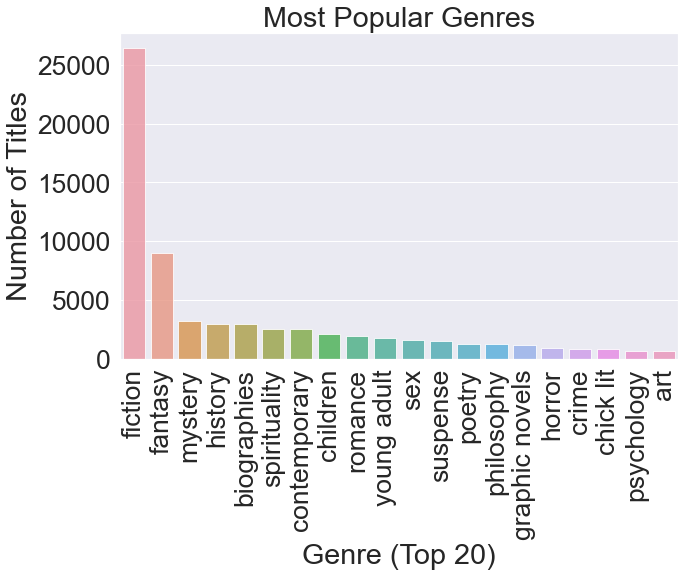

In [99]:
# Plots genre counts
plt.figure(figsize=(10,6))
sns.countplot(data=df2,x='split_genres', alpha=0.8, order=df2.split_genres.value_counts().iloc[:20].index)
plt.title('Most Popular Genres')
plt.ylabel('Number of Titles')
plt.xlabel('Genre (Top 20)')
plt.xticks(rotation=90)
plt.show()

In [29]:
# creates new dataframe grouping genres with their average rating
# sort by highest rating 
genre_ratings = df2.groupby('split_genres', as_index=False)['average_rate'].mean()
genre_ratings = genre_ratings.sort_values('average_rate', ascending=False)

In [30]:
genre_ratings.head()

,split_genres,average_rate
116,pop punk,4.860
90,metaphysical,4.720
147,theonomy,4.670
99,objectivism,4.345
53,firearms,4.325


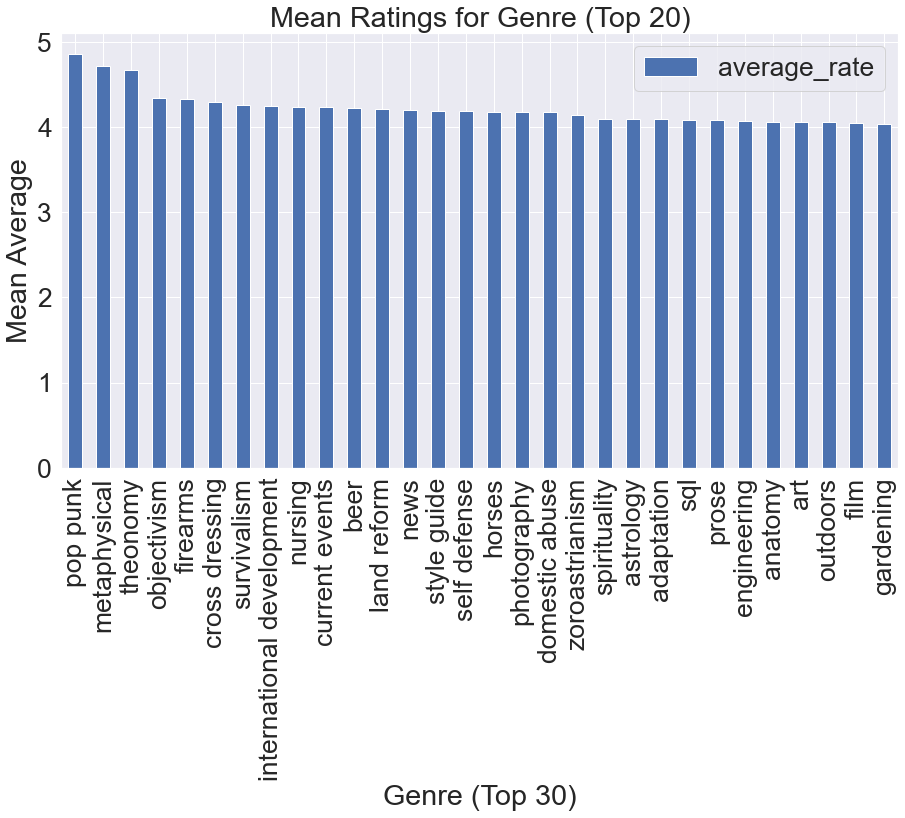

In [31]:
# plots the top 20 mean ratings for genres
genre_ratings.iloc[:30].plot(x = "split_genres", y = "average_rate", kind = "bar", figsize=(15,8), title="Mean Ratings for Genre (Top 20)")
plt.ylabel('Mean Average')
plt.xlabel('Genre (Top 30)')
plt.show()

In [32]:
genre_ratings.iloc[:20]

,split_genres,average_rate
116,pop punk,4.860000
90,metaphysical,4.720000
147,theonomy,4.670000
99,objectivism,4.345000
53,firearms,4.325000
33,cross dressing,4.290000
140,survivalism,4.260000
71,international development,4.250000
97,nursing,4.235000
35,current events,4.230000


In [33]:
# greates new dataframe that groups by genre and fan count, sorts by highest fan count
genre_fan_count = pd.DataFrame(df2.groupby('split_genres')['fan_count'].sum().reset_index().sort_values('fan_count', ascending=False))
genre_fan_count

,split_genres,fan_count
51,fiction,13182483
48,fantasy,7799621
27,contemporary,1477724
94,mystery,1262445
154,young adult,985023
...,...,...
38,domestic abuse,0
13,botany,0
153,wine,0
85,maps,0


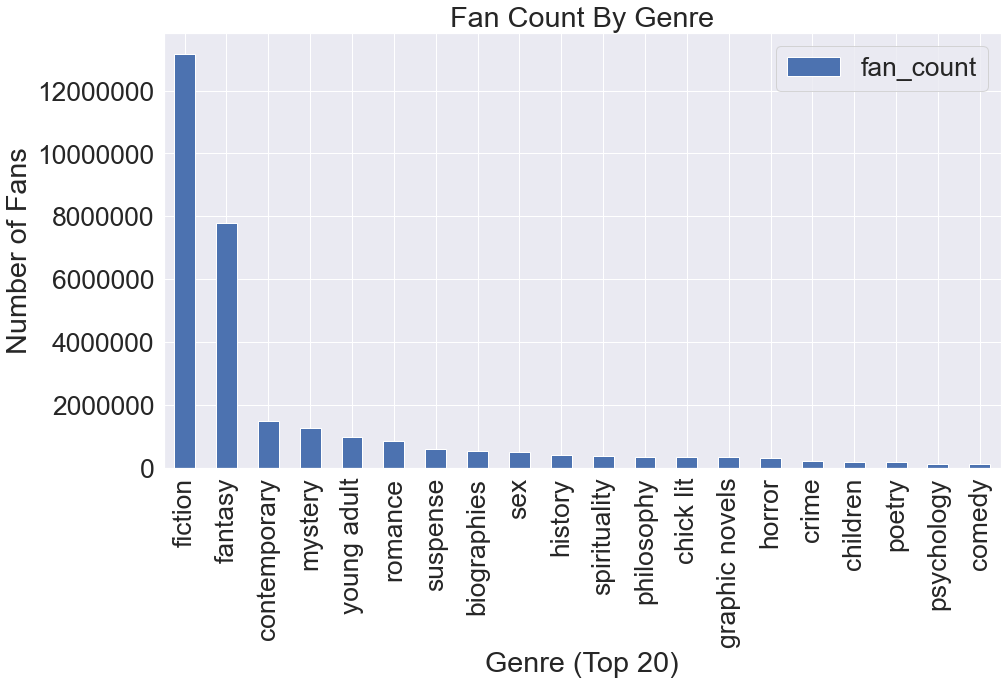

In [34]:
# plot top 20 fan count for genre
genre_fan_count.iloc[:20].plot(x = "split_genres", y = "fan_count", kind = "bar", figsize=(15,8), title="Fan Count By Genre")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Fans')
plt.xlabel('Genre (Top 20)')
plt.show()

In [35]:
# greates new dataframe that groups by genre and review count, sorts by highest review count
genre_review_count = pd.DataFrame(df2.groupby('split_genres')['review_count'].sum().reset_index().sort_values('review_count', ascending=False))
genre_review_count

,split_genres,review_count
51,fiction,36443815
48,fantasy,18965848
94,mystery,4988633
27,contemporary,3482044
154,young adult,3287134
...,...,...
85,maps,5
153,wine,2
36,cyberpunk,1
116,pop punk,1


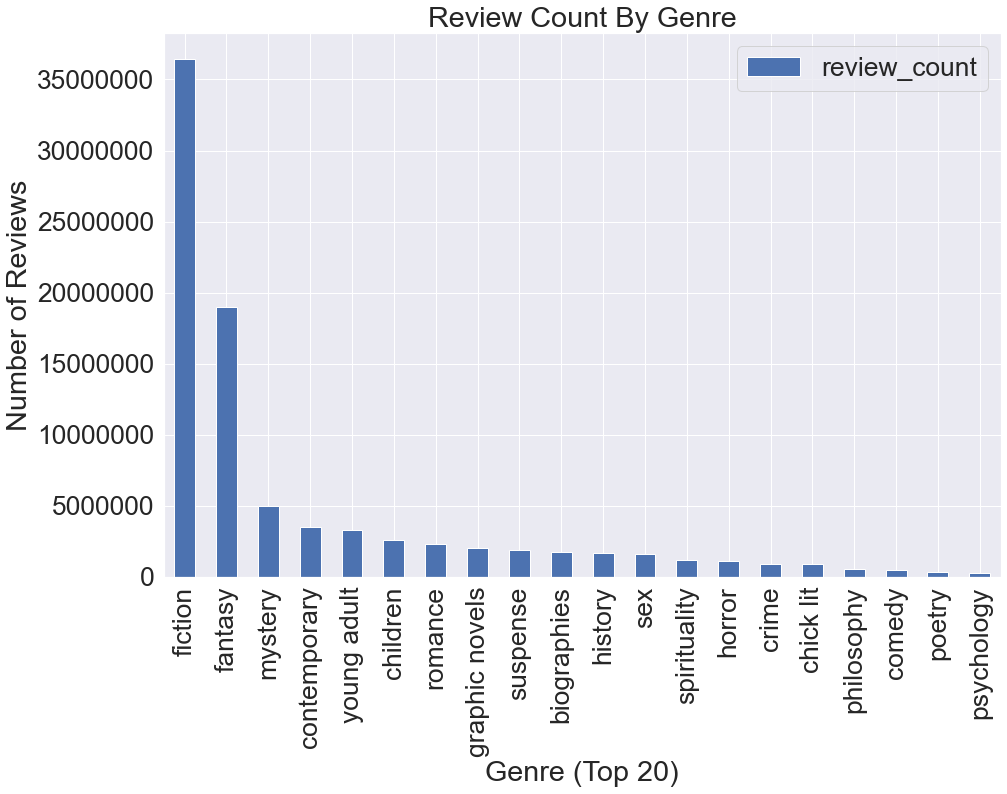

In [36]:
# plot top 20 review count for genre
genre_review_count.iloc[:20].plot(x = "split_genres", y = "review_count", kind = "bar", figsize=(15,10), title="Review Count By Genre")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Reviews')
plt.xlabel('Genre (Top 20)')
plt.show()

In [37]:
# shows top 20 review count
genre_review_count.iloc[:20]

,split_genres,review_count
51,fiction,36443815
48,fantasy,18965848
94,mystery,4988633
27,contemporary,3482044
154,young adult,3287134
17,children,2567303
126,romance,2323639
60,graphic novels,2005191
141,suspense,1863630
11,biographies,1729650


In [38]:
df2['born']= pd.to_datetime(df2['born'])

In [39]:
df2['year_born'] = pd.DatetimeIndex(df2['born']).year

In [40]:
born_df = df2.dropna(subset=['year_born'])
born_df['year_born'] = born_df.year_born.astype(int)
born_df.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country,split_genres,year_born
8,Phil Hamman,6,6,male,Phil Hamman is the co-author of the #1 nationa...,1958-03-07,3.83,1340,193,"biographies and memoirs,history,non fiction",NaN,fiction,1958
13,"John ""Red"" Shea",4,3,male,"John ""Red"" Shea, 40, was a top lieutenant in t...",1965-08-12,3.55,514,56,biographies and memoirs,United States,biographies,1965
15,Ricardo Ferrari,31,3,male,NaN,1957-01-18,3.68,345,31,comics,Argentina,comics,1957
45,محمد علي البار,54,37,male,<br />استشاري أمراض باطنية ، مستشار قسم الطب ا...,1939-12-29,3.65,230,36,"religion and spirituality,science,spirituality",Yemen,spirituality,1939
50,Anne Lyle,7,157,female,Anne Lyle was born in what is popularly known ...,1962-03-13,3.50,2344,388,"fantasy,fiction",NaN,fantasy,1962


In [41]:
born_df_genre = pd.DataFrame(born_df['split_genres'].value_counts().iloc[:10]).reset_index()

In [42]:
born_df_genre['index'].to_list()

['fiction',
 'fantasy',
 'biographies',
 'history',
 'mystery',
 'spirituality',
 'poetry',
 'children',
 'philosophy',
 'graphic novels']

In [43]:
born_df = born_df[born_df['split_genres'].isin(['fiction','fantasy','biographies','history','mystery','spirituality',
 'poetry','children','philosophy','graphic novels'])]

In [44]:
born_df = born_df.sort_values('year_born').reset_index()
born_df.drop(['index'], inplace=True, axis=1)
born_df.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country,split_genres,year_born
0,Bulleh Shah,13,60,unknown,"Bulleh Shah (1680–1757) (Punjabi: بلہے شاہ, ਬੁ...",1680-01-01,4.16,189,15,"philosophy,poetry",Pakistan,philosophy,1680
1,Ludvig Holberg,112,20,male,"Ludvig Holberg, Baron of Holberg, a writer, es...",1684-12-03,3.38,1857,88,"fiction,history,literature,philosophy",Norway,fiction,1684
2,George Berkeley,216,141,male,George Berkeley (/ˈbɑːrklɪ/;[1][2] 12 March 16...,1685-03-12,3.75,6161,201,philosophy,NaN,philosophy,1685
3,John Gay,128,20,male,<b>John Gay</b> was an English poet and dramat...,1685-06-30,3.50,4316,211,"drama,poetry",United Kingdom,poetry,1685
4,Alexander Pope,448,501,male,Alexander Pope is generally regarded as the gr...,1688-05-21,3.73,25793,853,poetry,United Kingdom,poetry,1688


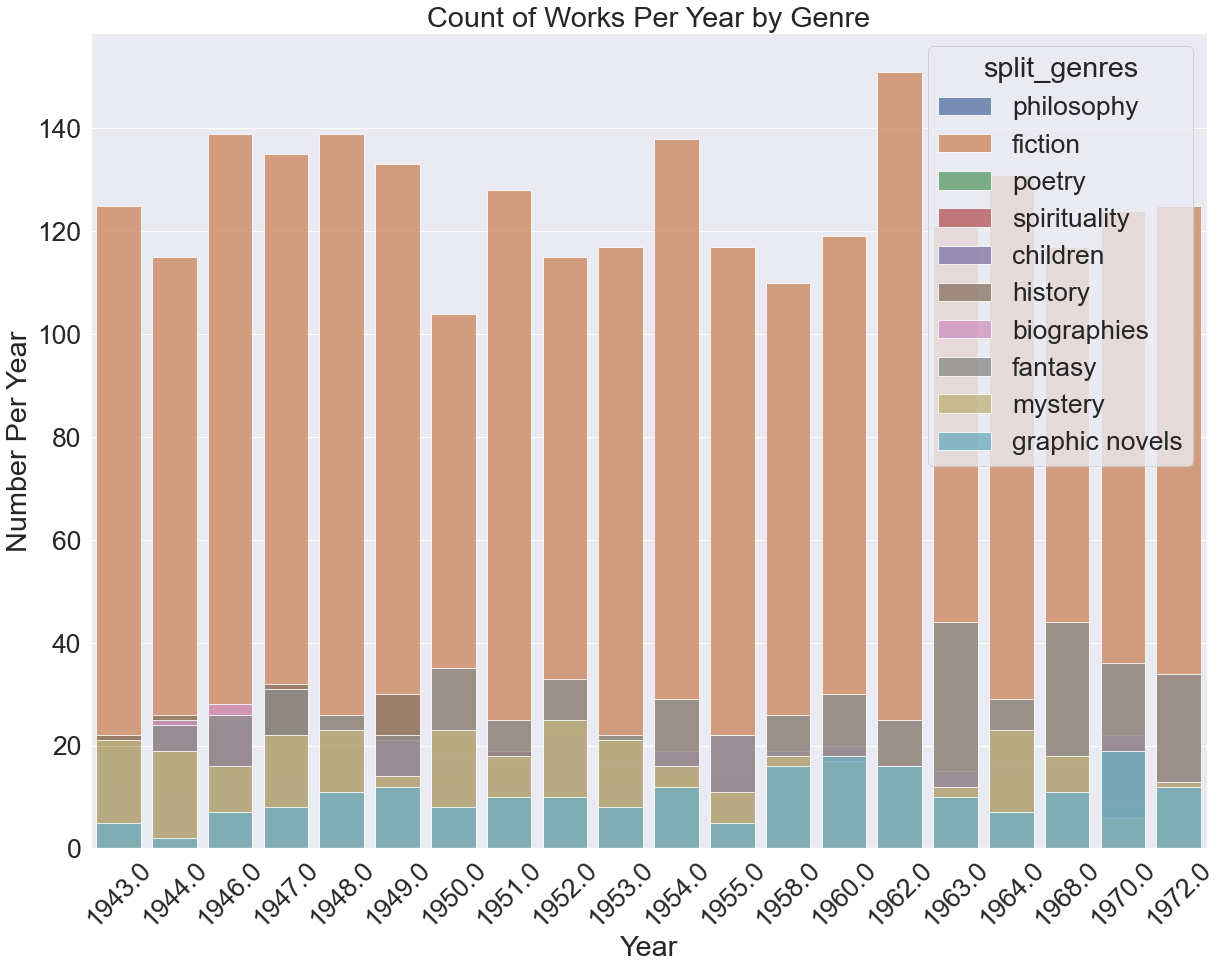

In [45]:
# plots top 10 genres by year born 
plt.figure(figsize=(20,15))
sns.countplot(data=born_df,x='year_born',hue='split_genres', alpha=0.8, order=df2.year_born.value_counts().iloc[:20].index.sort_values(), dodge=False)
plt.title('Count of Works Per Year by Genre')
plt.ylabel('Number Per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

#### Conclusion
- Out of the top 20 genres in this dataset according to number of works, women tend to write more fantasy, mystery, contemporary, chidrens bookd, romance, sex, suspense and chick lit books. Science fiction did not make the top 20 according to work count. 
- Men wrote more fiction, history, biographies, spiritual books, poetry, philosophy, graphic novels, horror, crime, psychology and art. 
- The unknown section includes nonbinary authors as well as those that don't have that data filled in. 
- fiction and fantasy had by far the largest number of works, though neither fall into the top 20 rated category. This is most likely due to the larger number of entries and the likelyhood of readers taking the time to rate them. 
- This can be demonstrated in the fan count - these are people who consistently follow, are up to date with specific authors, and regularly review their work. 
- fiction has the highest number of works throughout the years sampled (top 20 based on number of works. Followd mostly by fantasy and then mystery with a couple outliers. 

## Author Analysis: 

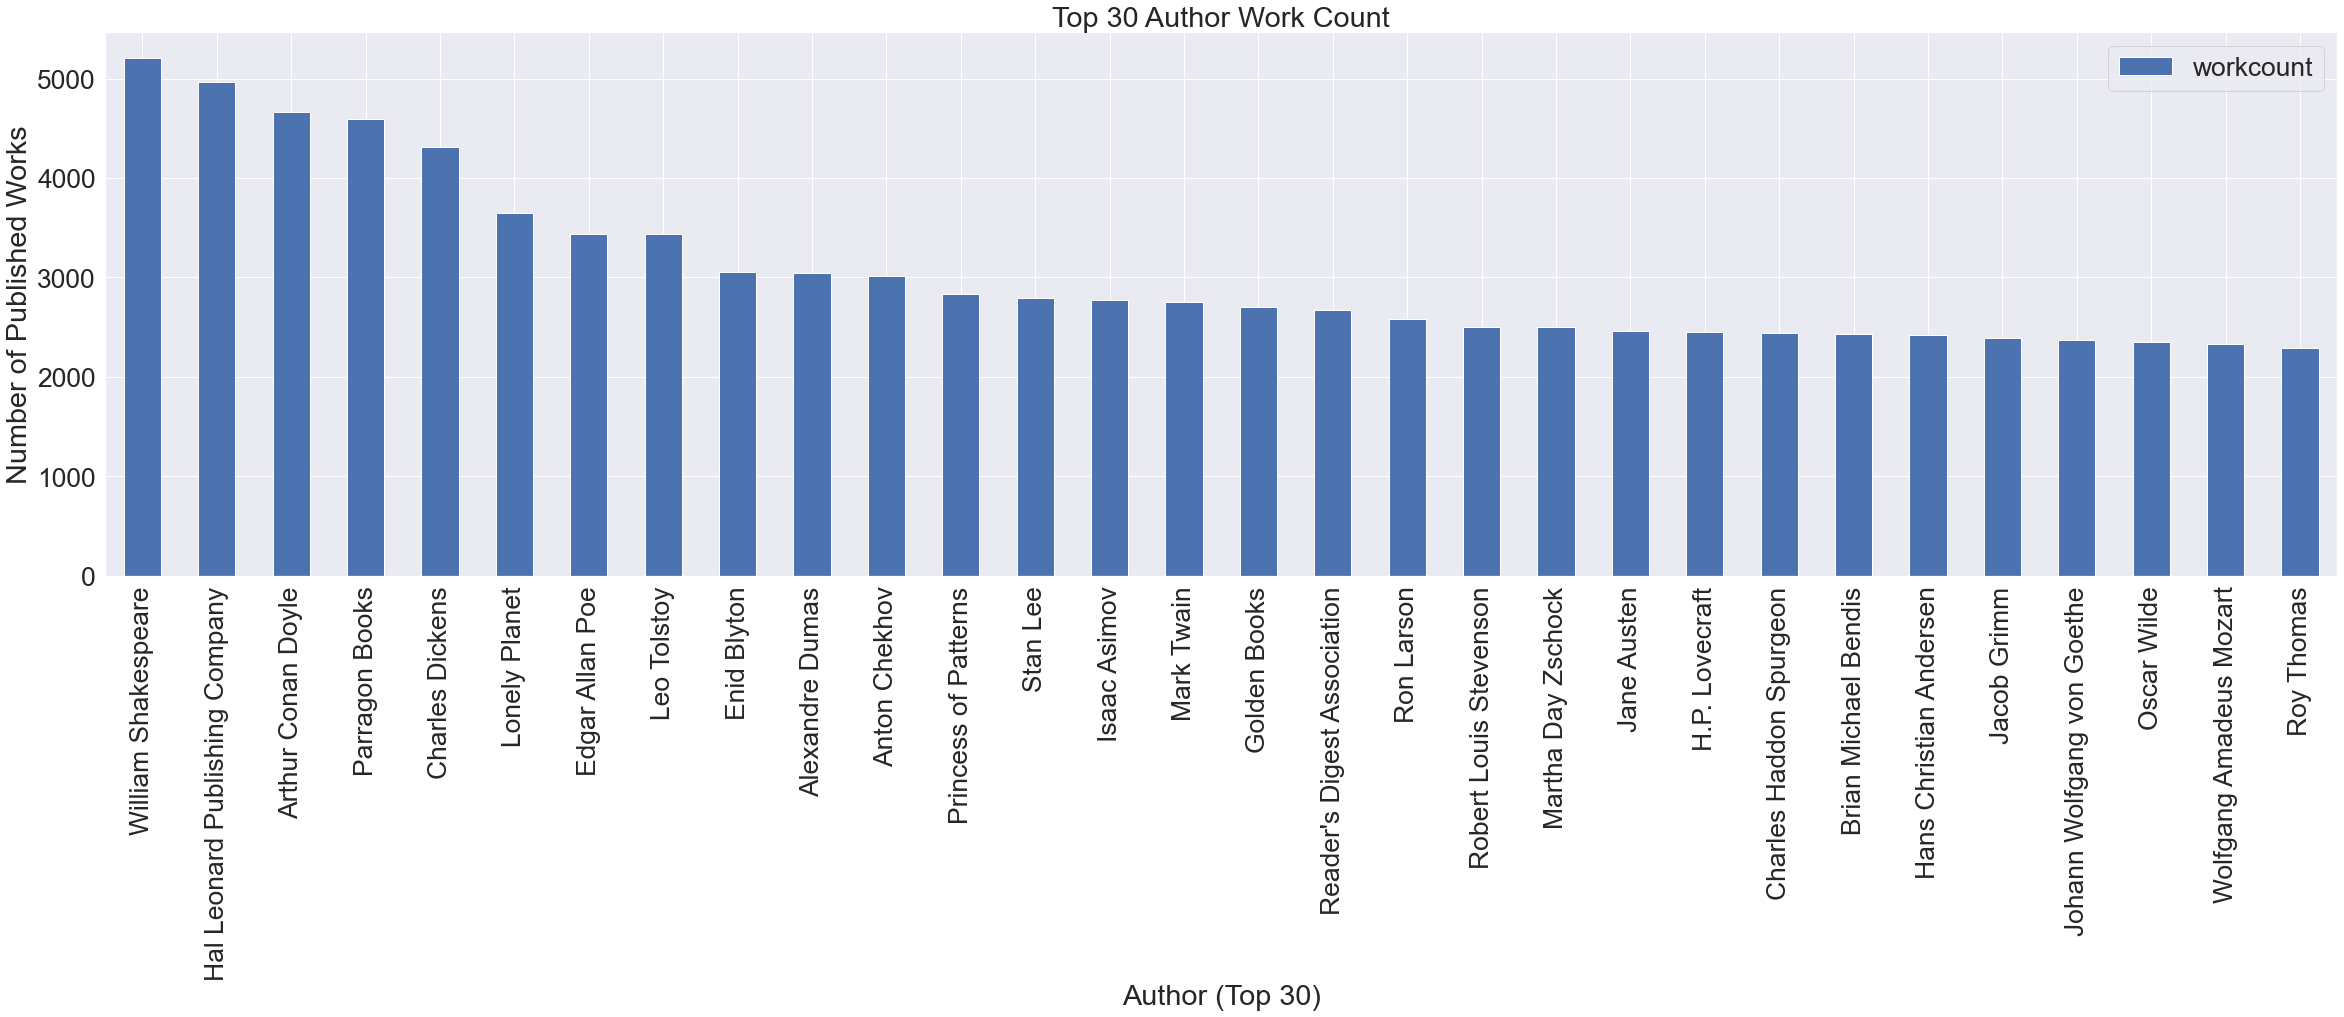

In [46]:
# plot top 30 author work counts - starts after the the first 3 because they are companies, not people
df3.iloc[3:33].plot(kind='bar', title='Top 30 Author Work Count', x='name', y='workcount', figsize=(40,10)) 
plt.ylabel('Number of Published Works')
plt.xlabel('Author (Top 30)')
plt.show()

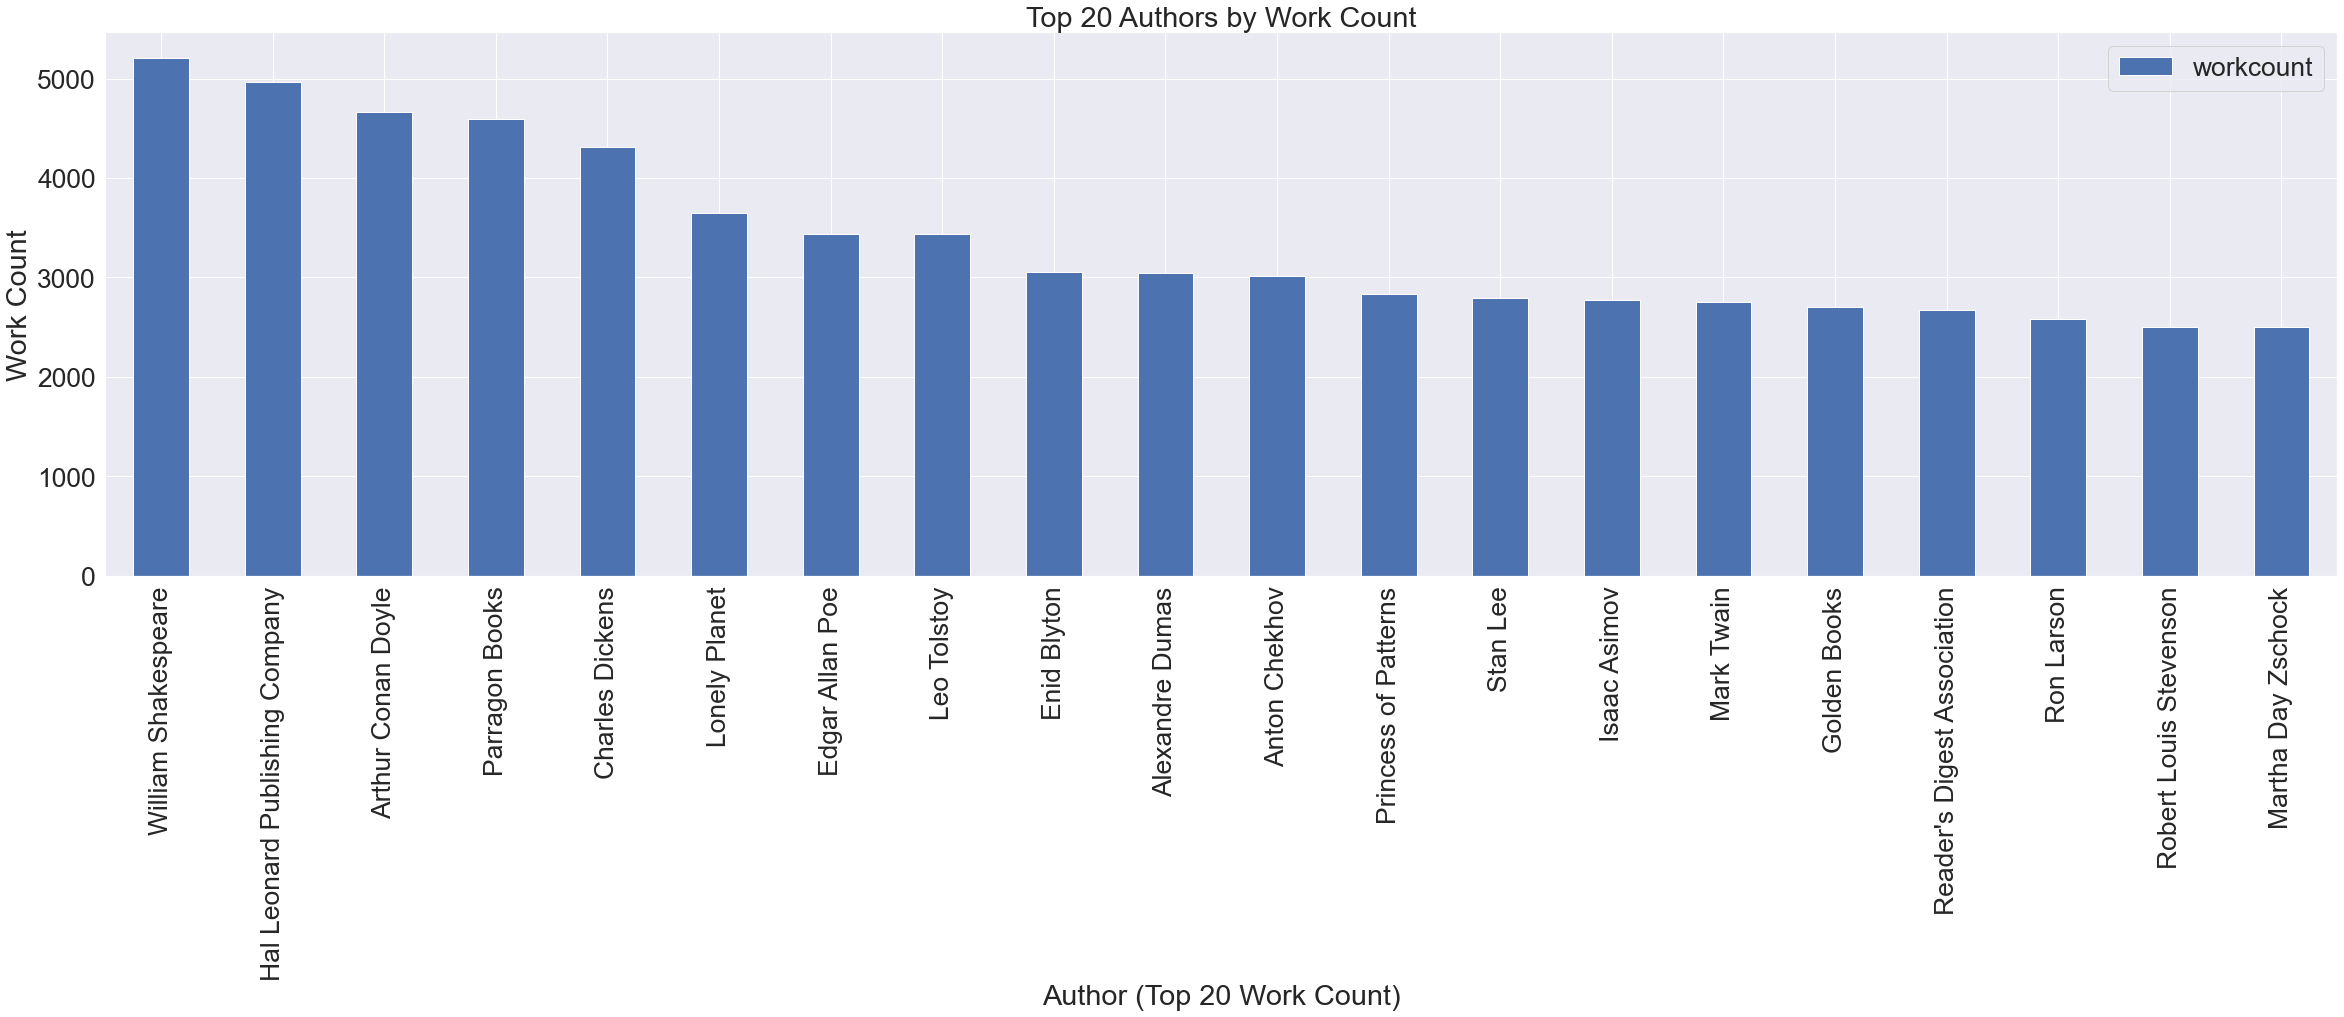

In [47]:
# plot top 20 authors by number of works skipping first 3 because they are corporations
df2.sort_values('workcount', ascending=False).iloc[3:23].plot(kind='bar', title='Top 20 Authors by Work Count', x='name', y='workcount', figsize=(40,10))
plt.ylabel('Work Count')
plt.xlabel('Author (Top 20 Work Count)')
plt.show()

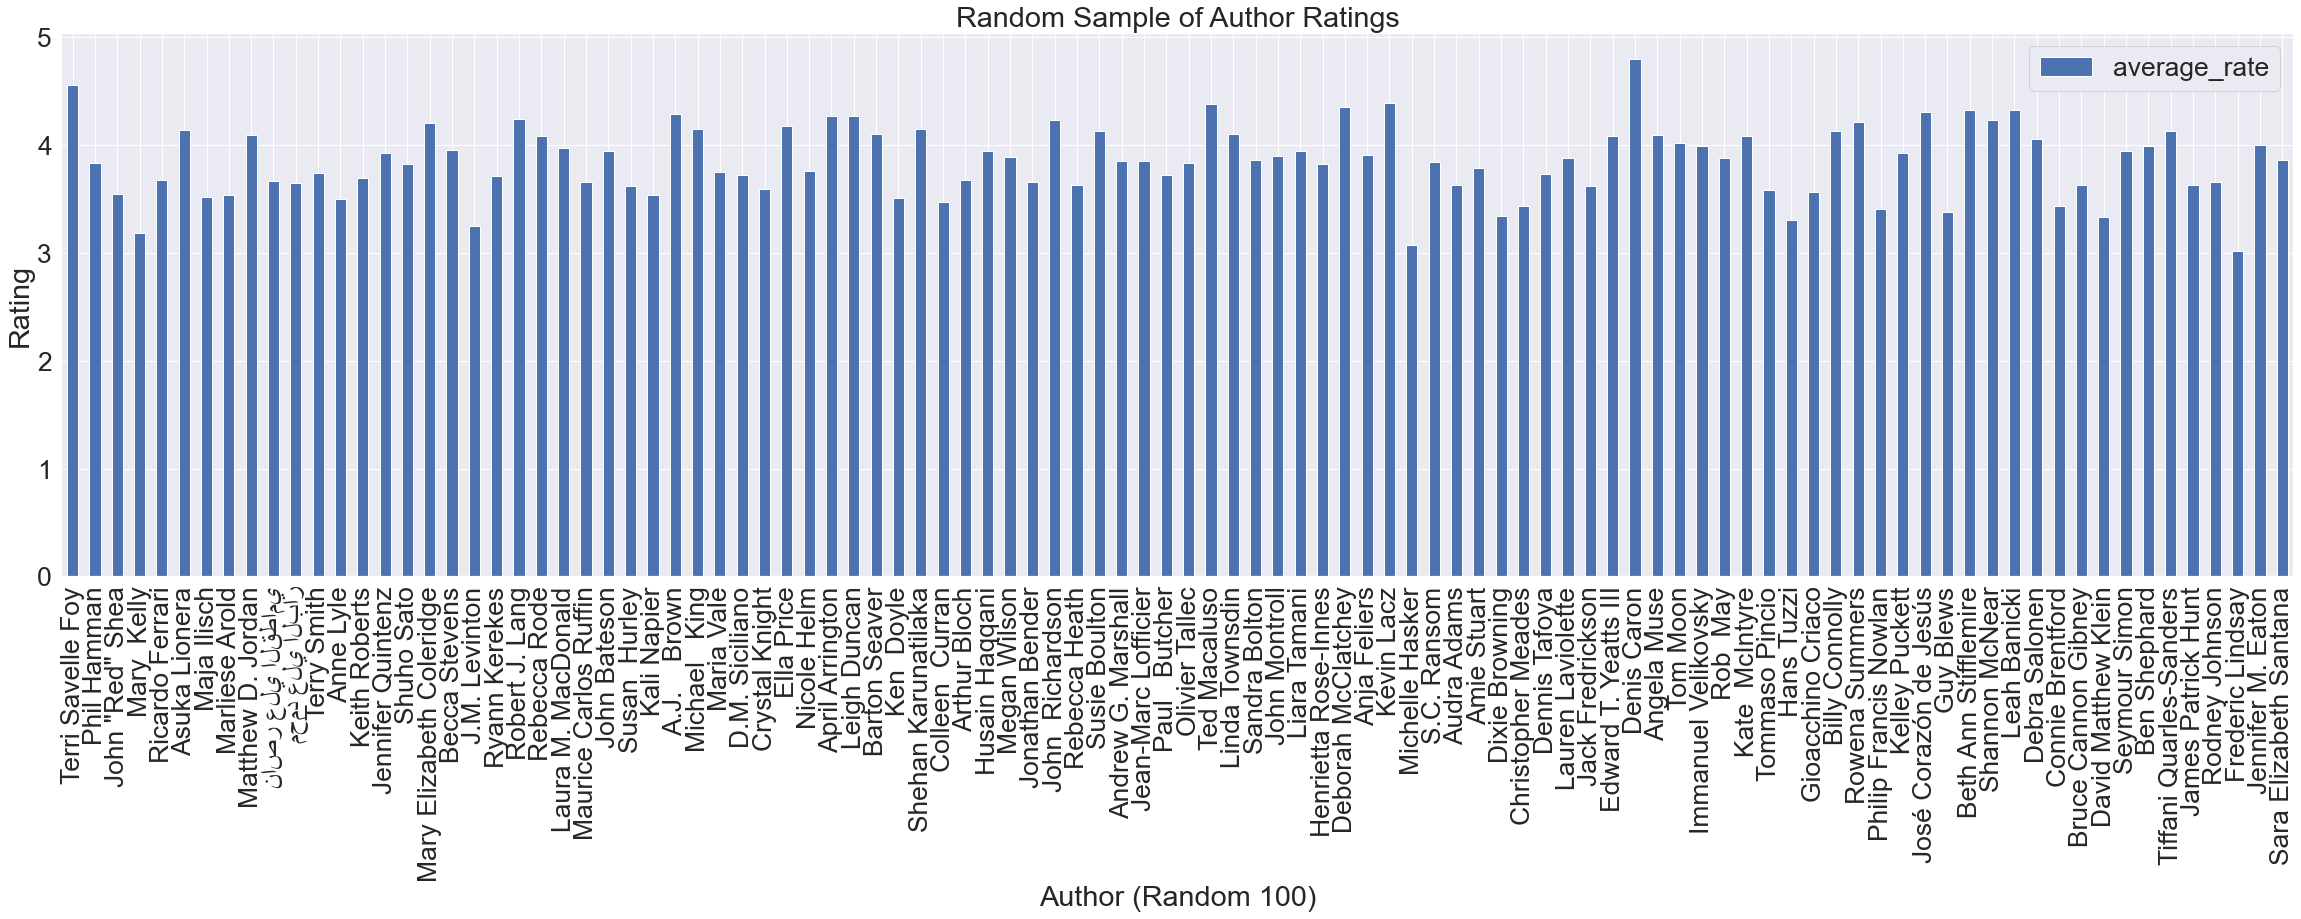

In [48]:
# plot top 100 authors by average rate
df2.iloc[1:101].plot(kind='bar', title='Random Sample of Author Ratings', x='name', y='average_rate', figsize=(40,10))
plt.ylabel('Rating')
plt.xlabel('Author (Random 100)')
plt.show()

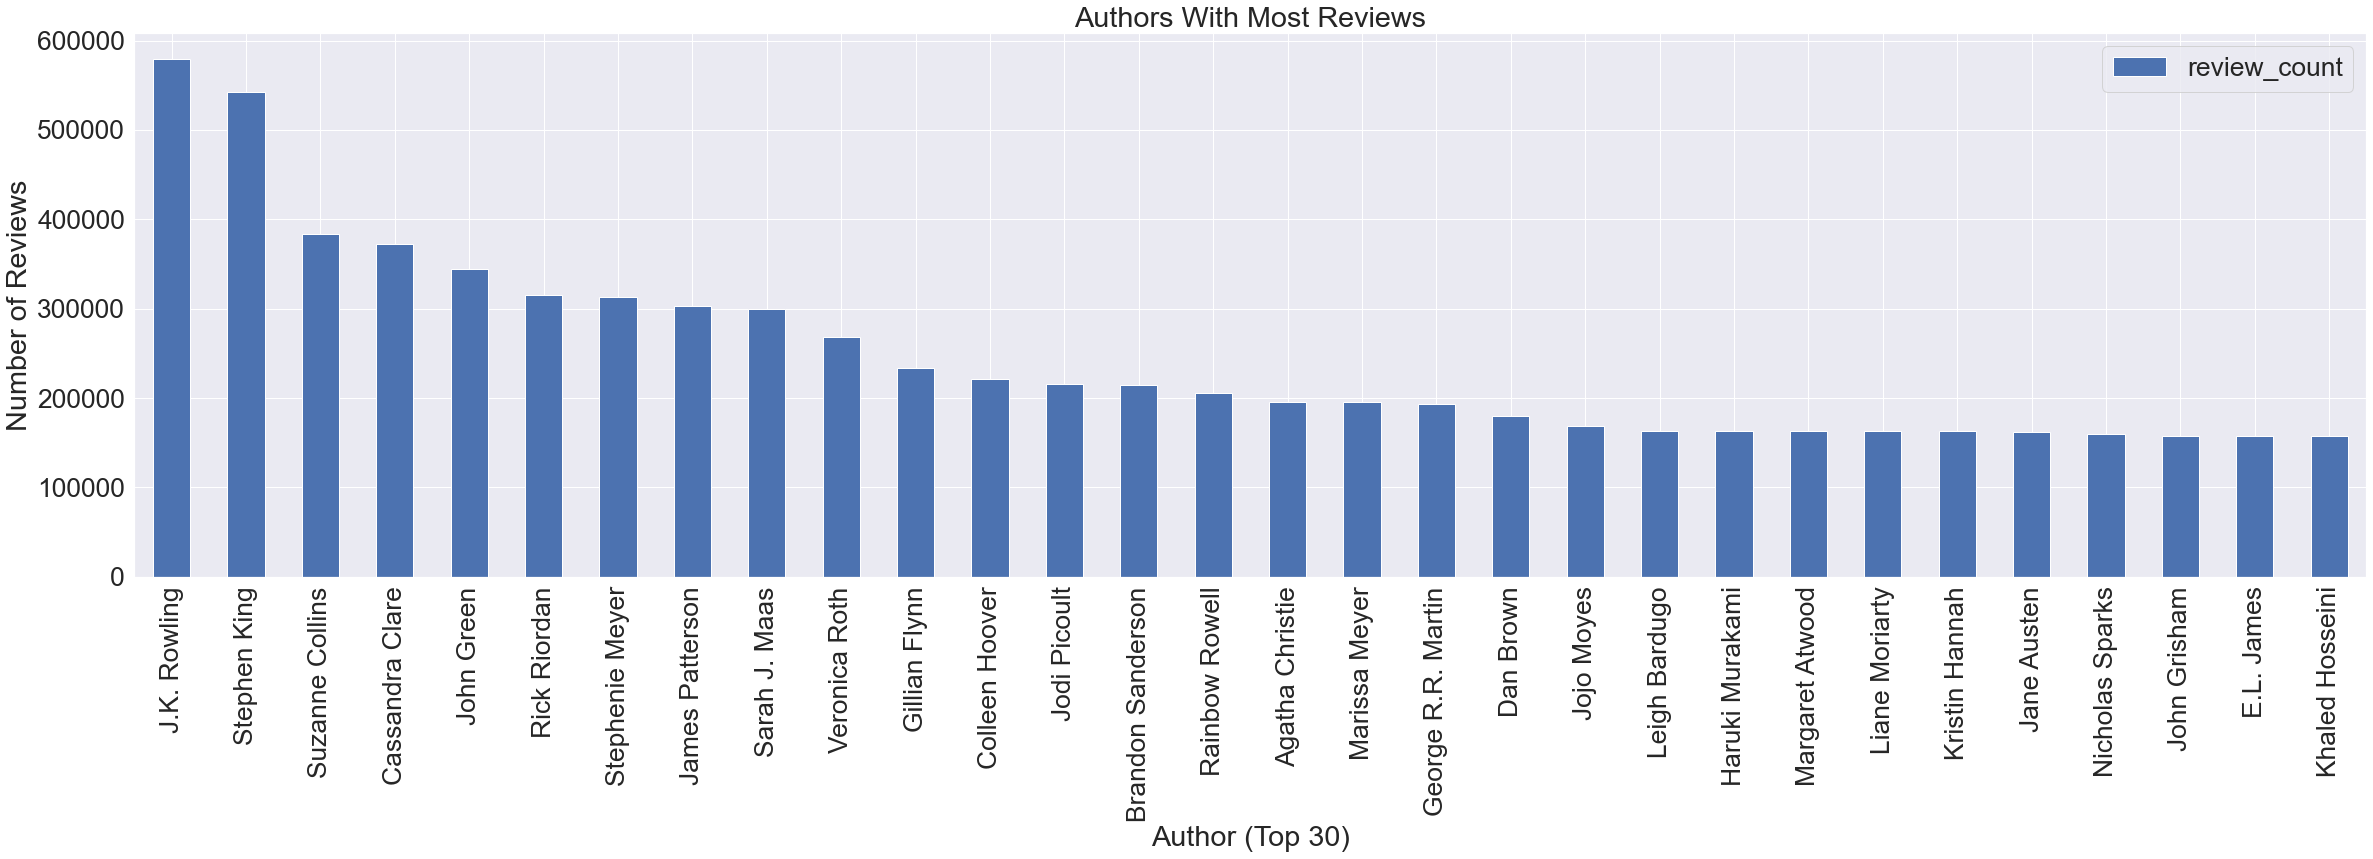

In [49]:
# plot top 30 review counts
df4.iloc[:30].plot(kind='bar', title='Authors With Most Reviews', x='name', y='review_count', figsize=(40,10))
plt.ylabel('Number of Reviews')
plt.xlabel('Author (Top 30)')
plt.show()

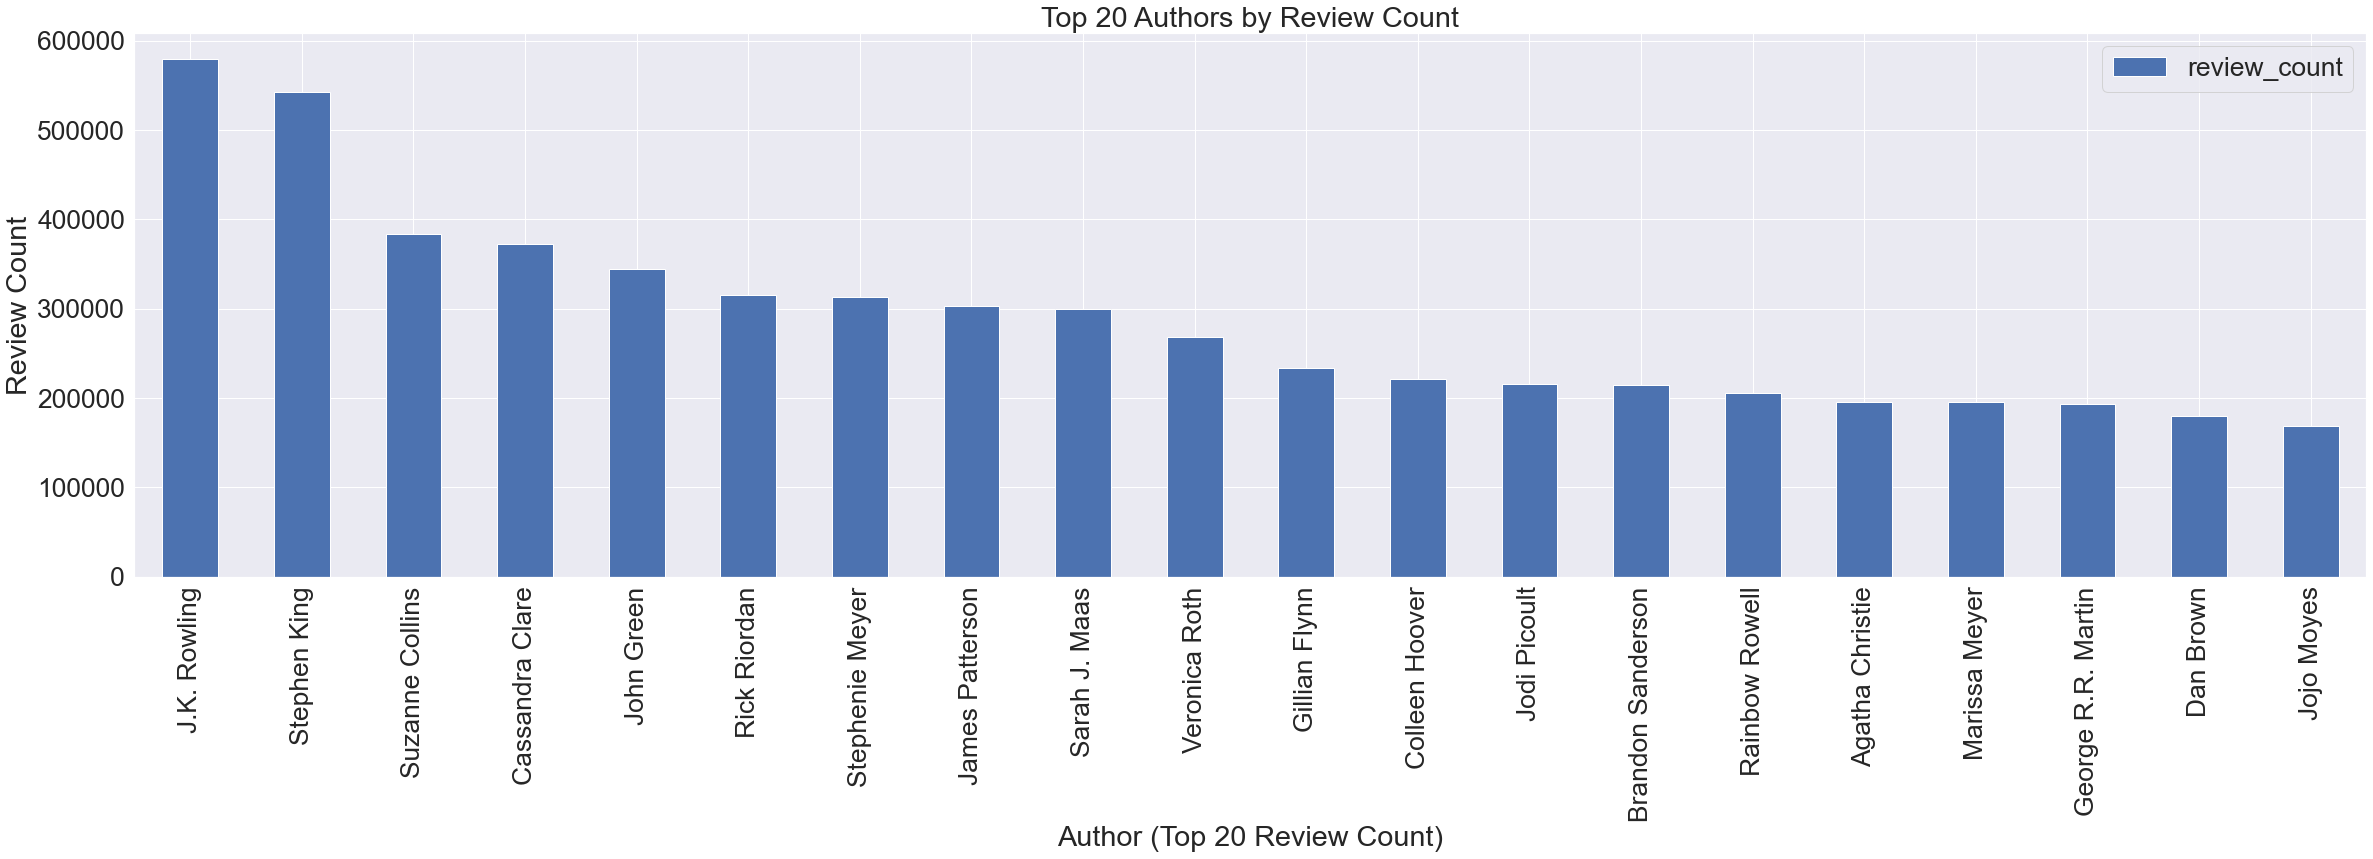

In [50]:
# plot top 20 authors by number of reviews
df2.sort_values('review_count', ascending=False).iloc[:20].plot(kind='bar', title='Top 20 Authors by Review Count', x='name', y='review_count', figsize=(40,10))
plt.ylabel('Review Count')
plt.xlabel('Author (Top 20 Review Count)')
plt.show()

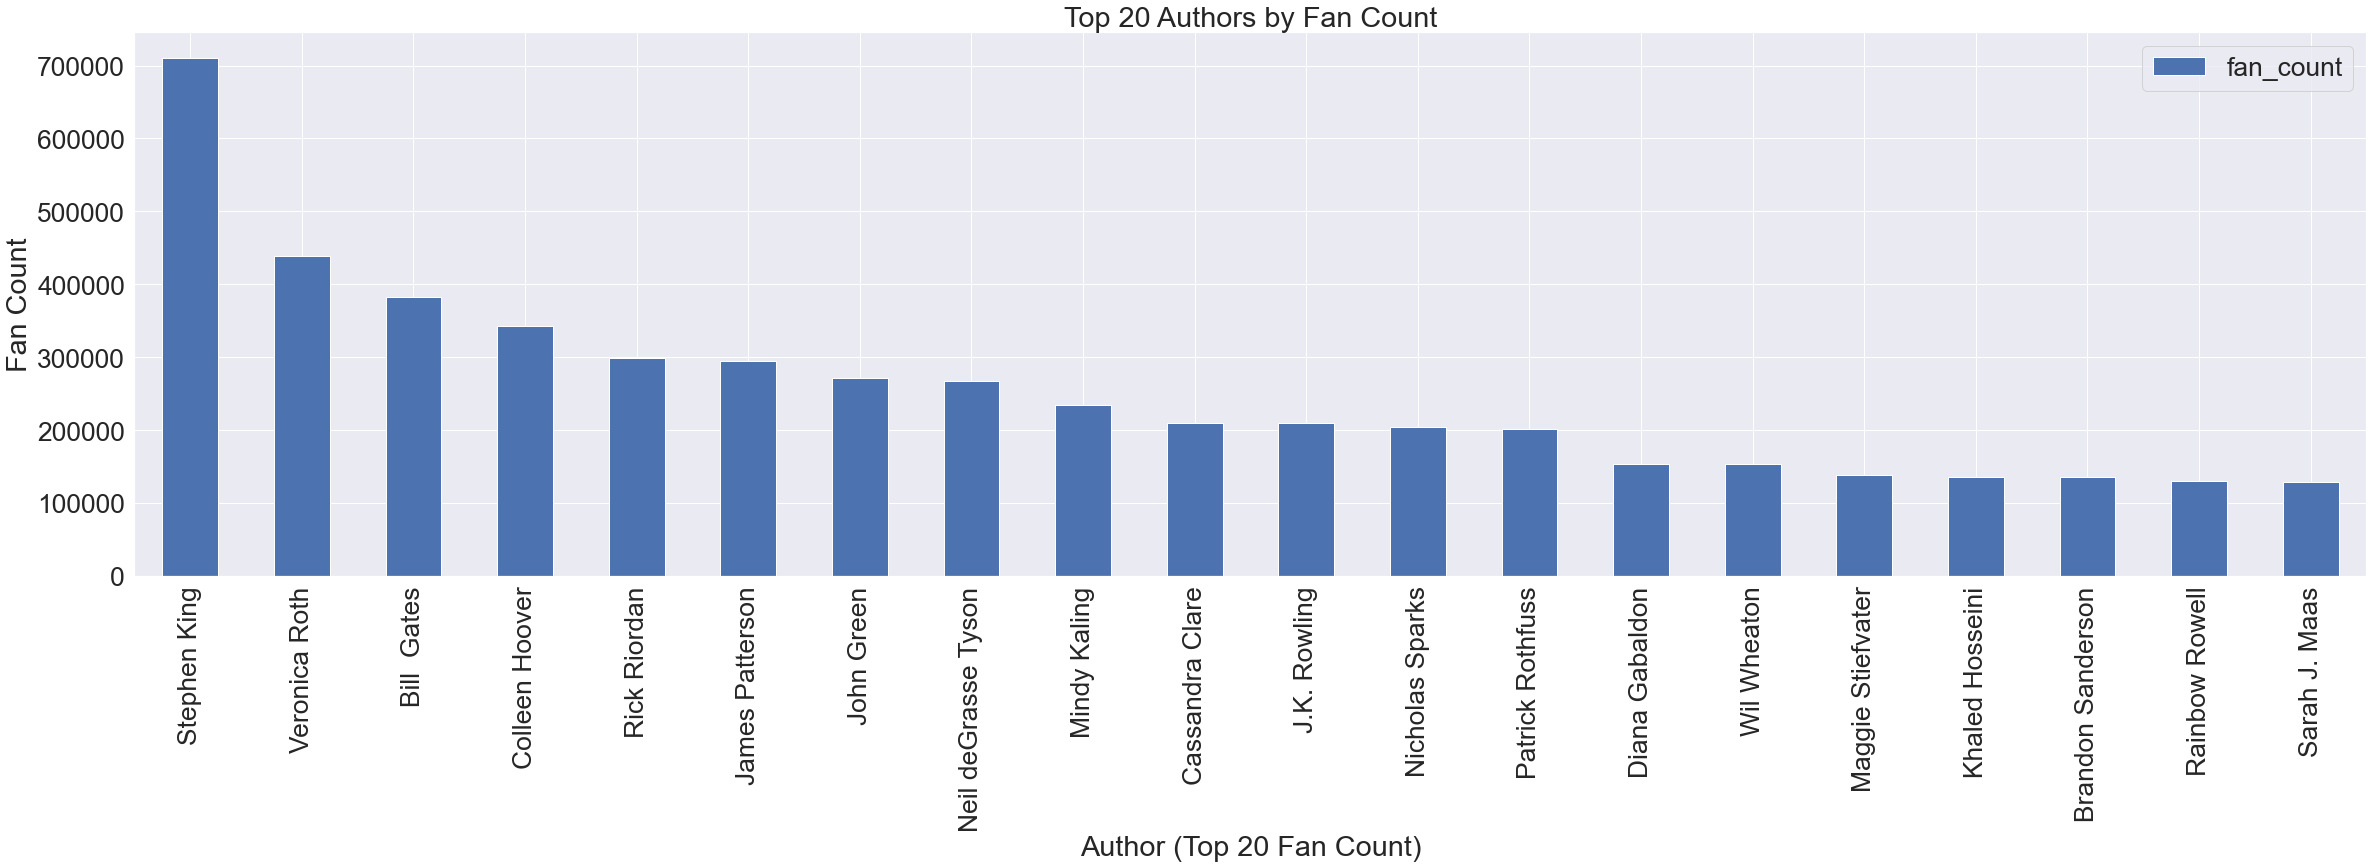

In [51]:
# plot top 20 authors by number of fans 
df2.sort_values('fan_count', ascending=False).iloc[:20].plot(kind='bar', title='Top 20 Authors by Fan Count', x='name', y='fan_count', figsize=(40,10))
plt.ylabel('Fan Count')
plt.xlabel('Author (Top 20 Fan Count)')
plt.show()

### Conclusions:
- William Shakespear has the highest work count at over 5000. This value is most likely inflated due to translations into different languages being included. 
- Stephen King has the highest number of fans
- JK Rowling has the highest number of reviews

## Gender Analysis: 

In [52]:
# create new dataframe sorting by average rate
df5 = df2.sort_values('average_rate', ascending=False)
df5.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country,split_genres,year_born
123401,silentauror,29,9,unknown,"""The breakdown: 35. Canuckian. ESL professor. ...",NaT,8.07,60,21,"fiction,mystery and thrillers,romance",NaN,fiction,NaN
6802,Karin Mitchell,1,0,female,Karin Mitchell is a writer living in a small t...,NaT,5.00,2,0,"history,non fiction",NaN,fiction,NaN
190763,Geoffrey Olsen,2,11,male,NaN,NaT,5.00,18,1,poetry,United States,poetry,NaN
25358,Bukky Agboola,3,2,unknown,"Bukky Agboola is a Christian author, speaker, ...",NaT,5.00,4,1,"biographies and memoirs,religion and spirituality",NaN,biographies,NaN
200499,Flax Glor,1,3,male,"Flax Glor was born and raised in Santa Cruz, C...",NaT,5.00,4,2,art,United States,art,NaN


In [53]:
# create new dataframe counting number of authors by gender
gender_count = pd.DataFrame(df2['gender'].value_counts())
gender_count

,gender
male,30956
female,30636
unknown,12391


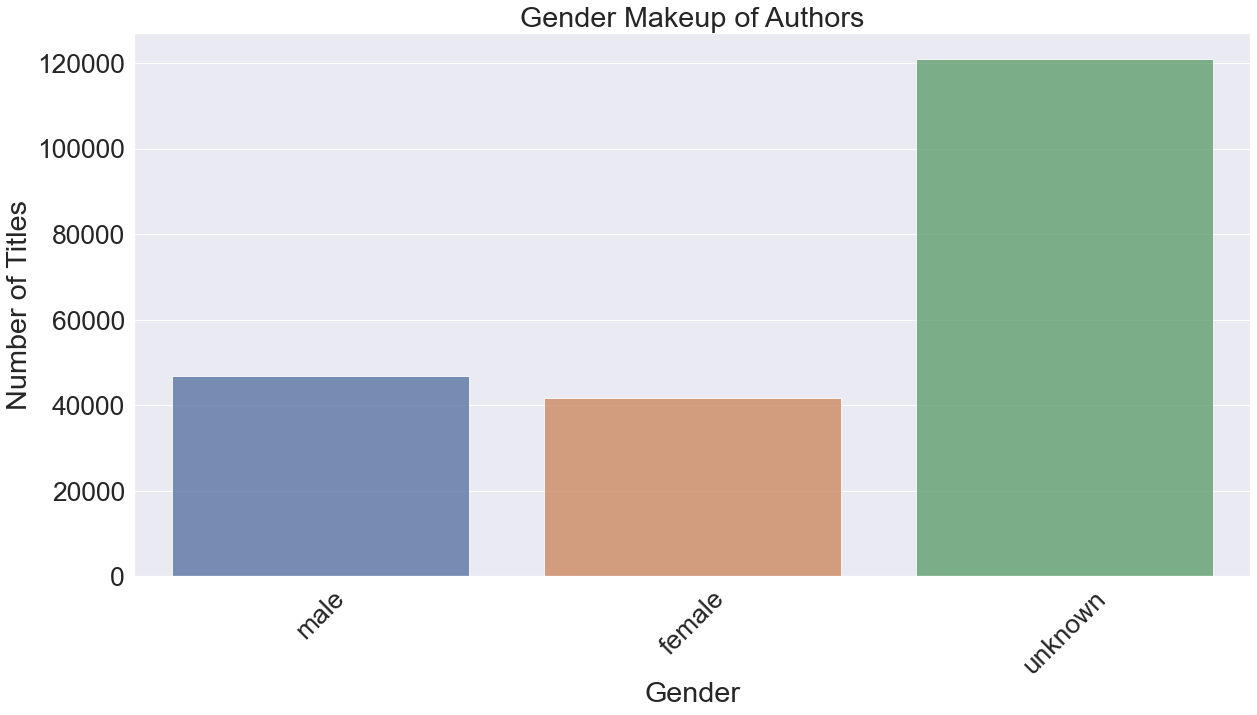

In [54]:
# plot gender count of authors (using all entries including those droped for genre null values)
plt.figure(figsize=(20,10))
sns.countplot(data=df1,x='gender', alpha=0.8, order=df2.gender.value_counts().iloc[:3].index)
plt.title('Gender Makeup of Authors')
plt.ylabel('Number of Titles')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

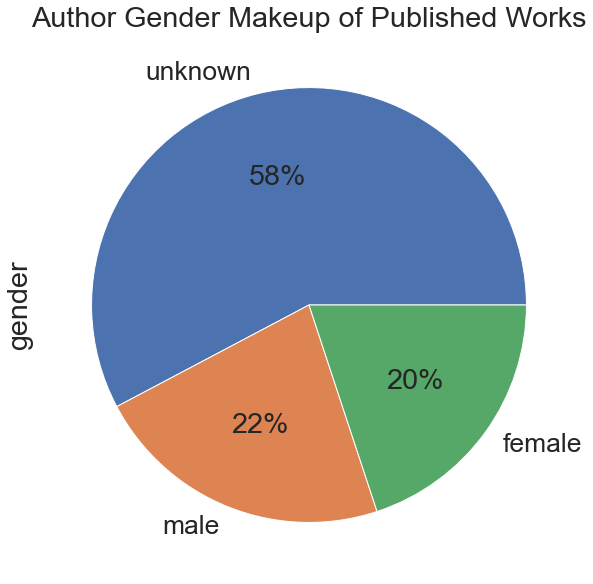

In [55]:
# plots pie chart containing percentage of total authors in each gender (including those dropped for genre null values)
df1.gender.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10), title="Author Gender Makeup of Published Works")
plt.show()

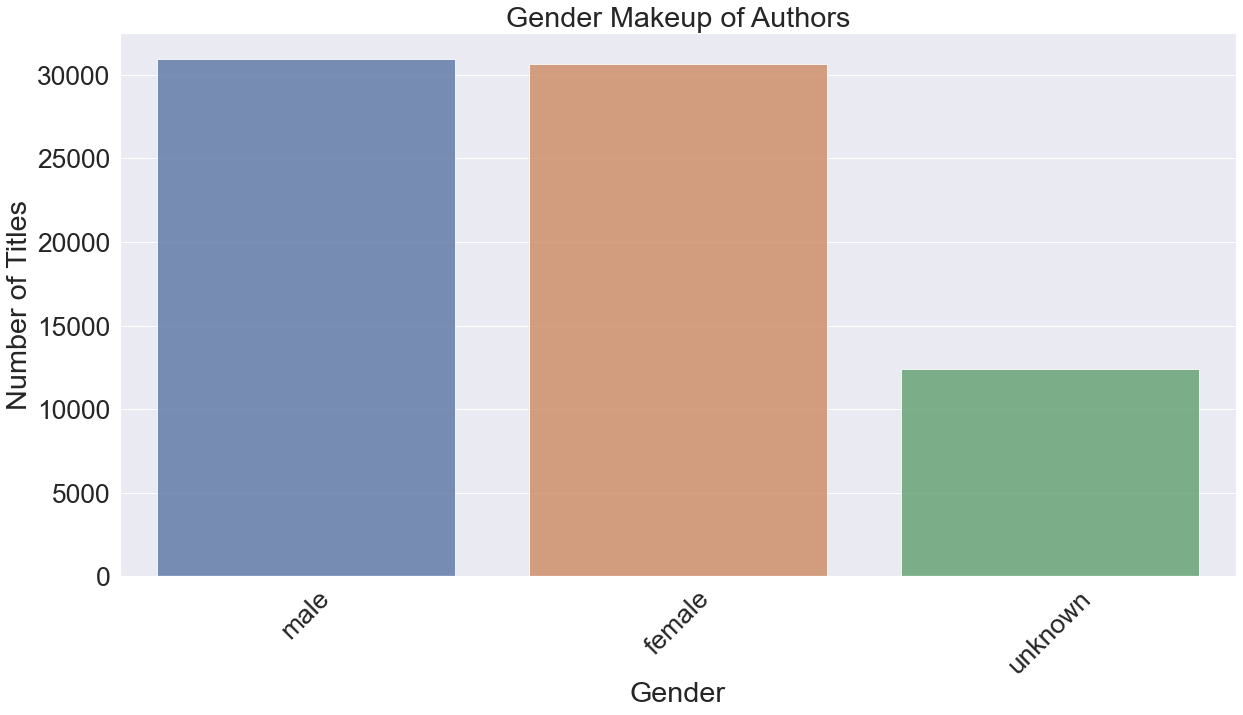

In [56]:
# plot gender count of authors (dropped genre nulls)
plt.figure(figsize=(20,10))
sns.countplot(data=df2,x='gender', alpha=0.8, order=df2.gender.value_counts().iloc[:3].index)
plt.title('Gender Makeup of Authors')
plt.ylabel('Number of Titles')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

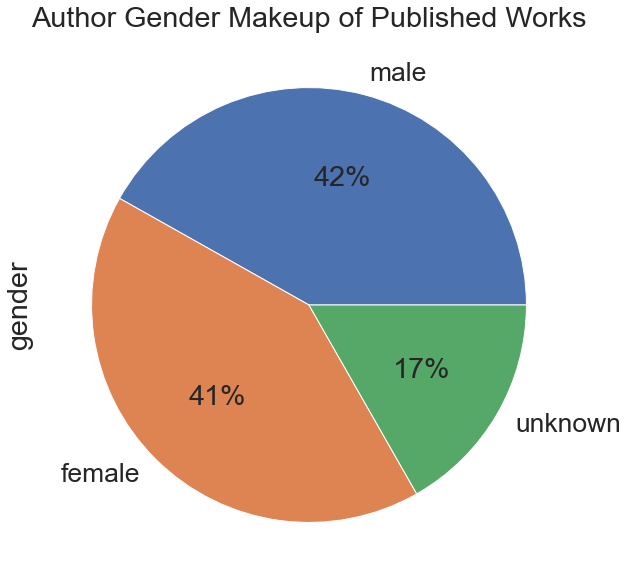

In [57]:
# plots pie chart containing percentage of total authors in each gender (dropped genre nulls)
df2.gender.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10), title="Author Gender Makeup of Published Works")
plt.show()

In [58]:
# create new dataframe containing only female authors
df_female1 = df1[(df1.gender.str.contains('female'))]
df_female2 = df2[(df2.gender.str.contains('female'))]

In [59]:
df_female1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41761 entries, 2 to 209512
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41761 non-null  object 
 1   workcount     41761 non-null  int64  
 2   fan_count     41761 non-null  int64  
 3   gender        41761 non-null  object 
 4   about         32825 non-null  object 
 5   born          9248 non-null   object 
 6   average_rate  41761 non-null  float64
 7   rating_count  41761 non-null  int64  
 8   review_count  41761 non-null  int64  
 9   genre         30636 non-null  object 
 10  country       15582 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.8+ MB


In [60]:
df_female1.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
2,Nanna Foss,6,156,female,Danish YA writer. <br /><br />I make up storie...,NaN,4.35,1172,205,"fantasy,fiction,paranormal",NaN
3,Terri Savelle Foy,23,125,female,"For years, Terri Savelle Foy’s life was averag...",NaN,4.56,1054,151,"religion and spirituality,self help,spirituality",NaN
17,Lucie Dufresne,17,0,female,Lucie Dufresne was born in 1951 in Trois-Riviè...,NaN,3.79,305,30,NaN,Canada
25,Maja Ilisch,6,6,female,"Maja Ilisch, geboren 1975 in Dortmund, studier...",NaN,3.52,168,73,"fantasy,horror,sex",Germany
27,Jennifer Jäger,13,40,female,NaN,NaN,3.34,149,41,NaN,NaN


In [61]:
# create new datraframe containing only male authors
df_male1 = df1[(df1.gender.str.match('male'))]
df_male2 = df2[(df2.gender.str.match('male'))]

In [62]:
df_male1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46783 entries, 0 to 209516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          46783 non-null  object 
 1   workcount     46783 non-null  int64  
 2   fan_count     46783 non-null  int64  
 3   gender        46783 non-null  object 
 4   about         35526 non-null  object 
 5   born          18902 non-null  object 
 6   average_rate  46783 non-null  float64
 7   rating_count  46783 non-null  int64  
 8   review_count  46783 non-null  int64  
 9   genre         30956 non-null  object 
 10  country       23336 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.3+ MB


In [63]:
df_male1.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country
0,Jason Wallace,2,13,male,Jason Wallace is related to Tolkien and a desc...,NaN,3.74,1028,175,NaN,United Kingdom
8,Phil Hamman,6,6,male,Phil Hamman is the co-author of the #1 nationa...,1958-03-07,3.83,1340,193,"biographies and memoirs,history,non fiction",NaN
10,August Turak,3,12,male,NaN,NaN,4.34,274,49,NaN,NaN
13,"John ""Red"" Shea",4,3,male,"John ""Red"" Shea, 40, was a top lieutenant in t...",1965-08-12,3.55,514,56,biographies and memoirs,United States
15,Ricardo Ferrari,31,3,male,NaN,1957-01-18,3.68,345,31,comics,Argentina


In [64]:
# create new dataframe containing only unknown gender authors 
df_unknown1 = df1[(df1.gender.str.contains('unknown'))]
df_unknown2 = df2[(df2.gender.str.contains('unknown'))]

In [65]:
df_unknown1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120973 entries, 1 to 209515
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          120973 non-null  object 
 1   workcount     120973 non-null  int64  
 2   fan_count     120973 non-null  int64  
 3   gender        120973 non-null  object 
 4   about         18373 non-null   object 
 5   born          3080 non-null    object 
 6   average_rate  120973 non-null  float64
 7   rating_count  120973 non-null  int64  
 8   review_count  120973 non-null  int64  
 9   genre         12391 non-null   object 
 10  country       5681 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 11.1+ MB


In [66]:
# sorts df_female by split_genre
df_female2 = df_female2.sort_values('split_genres')

In [67]:
df_female2.head()

,name,workcount,fan_count,gender,about,born,average_rate,rating_count,review_count,genre,country,split_genres,year_born
202642,Valerie C. Scanlon,8,3,female,<i>Librarian Note:<br />There is more than one...,NaT,4.06,125,2,anatomy,NaN,anatomy,NaN
176027,Gloria Swindler Boutte,4,0,female,NaN,NaT,3.50,6,1,animal,NaN,animal,NaN
157644,Nicole Wilde,12,23,female,"Nicole Wilde is an internationally recognized,...",NaT,4.09,849,68,"animal,training",NaN,animal,NaN
200615,Paige Sleuth,34,61,female,Paige Sleuth is a pseudonym for mystery author...,NaT,3.91,2017,192,"animal,mystery and thrillers",NaN,animal,NaN
28782,Margaret Allen,51,0,female,<i>Librarian Note:<br />There is more than one...,NaT,3.66,161,12,"animal,children",NaN,animal,NaN


(2.5, 5.0)

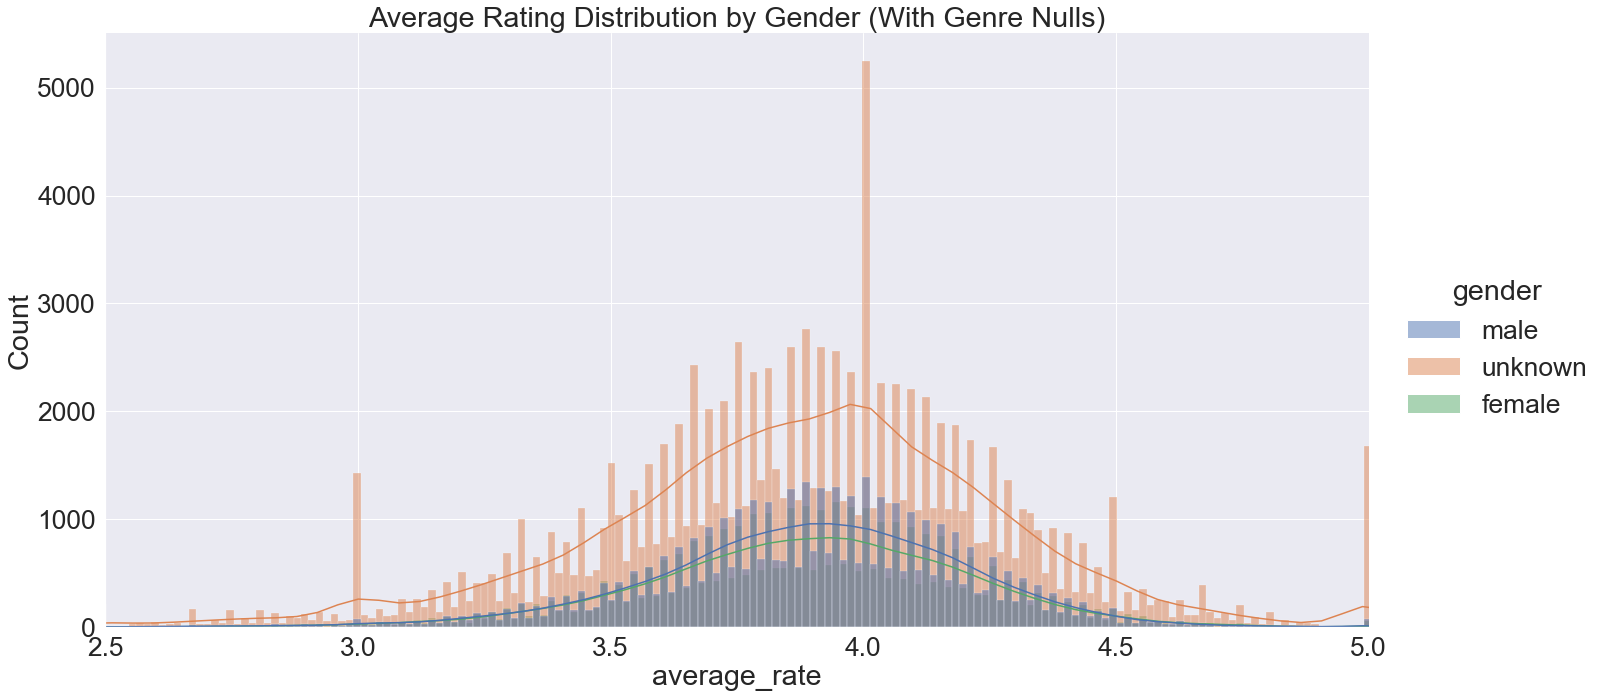

In [68]:
# plot distribution of average rating by gender including genre nulls
sns.displot(data=df1, x="average_rate", hue='gender', kde=True, height=10, aspect=2)
plt.title("Average Rating Distribution by Gender (With Genre Nulls)")
plt.xlim(2.5,5)

(2.5, 5.0)

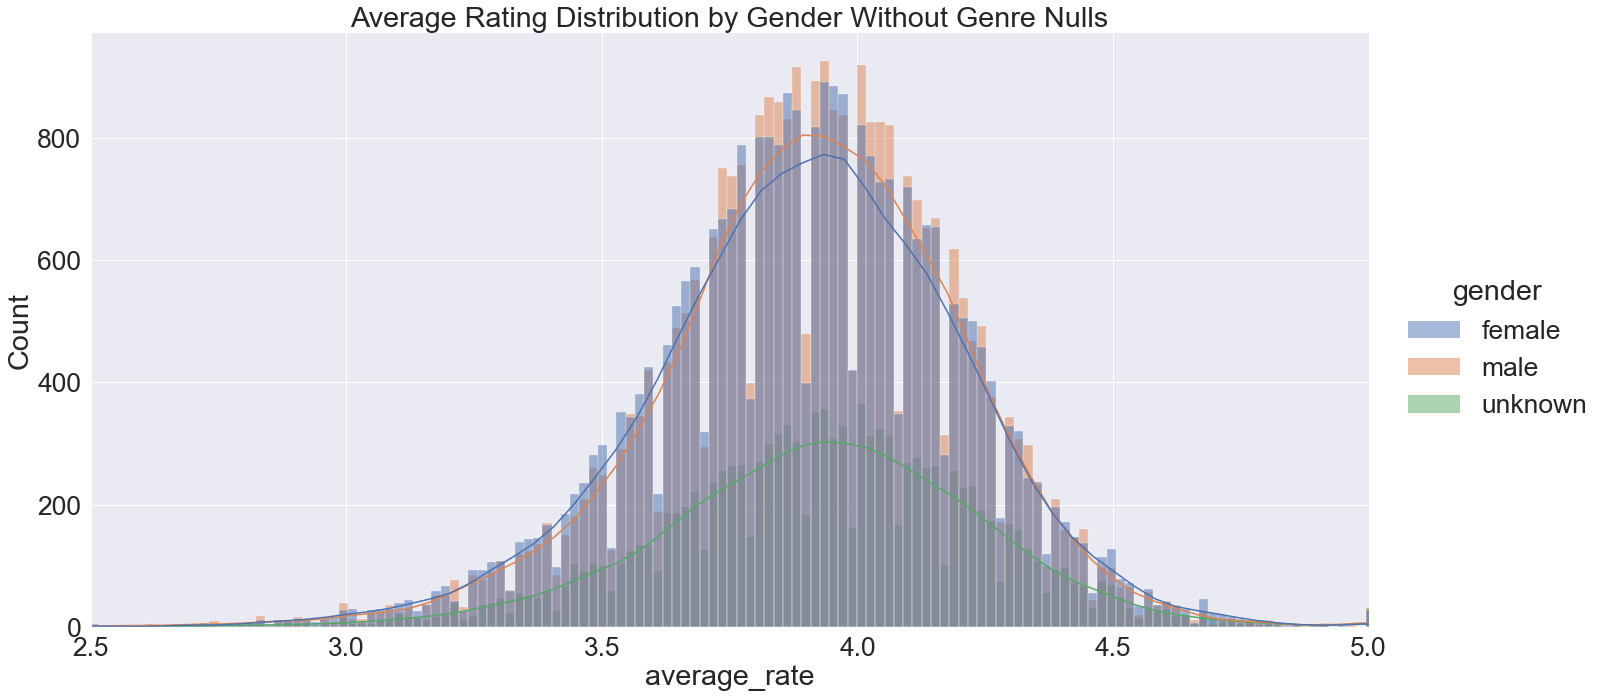

In [69]:
# plot distribution of average rating by gender without genre nulls
sns.displot(data=df2, x="average_rate", hue='gender', kde=True, height=10, aspect=2)
plt.title("Average Rating Distribution by Gender Without Genre Nulls")
plt.xlim(2.5,5)

In [70]:
# creates new dataframe grouping by gender and counting reviews using df including genre nulls
review_count1 = pd.DataFrame(df1.groupby('gender')['review_count'].sum().reset_index())
review_count1

,gender,review_count
0,female,50180250
1,male,37397055
2,unknown,20233265


In [71]:
# creates new dataframe grouping by gender and counting reviews without genre nulls
review_count2 = pd.DataFrame(df2.groupby('gender')['review_count'].sum().reset_index())
review_count2

,gender,review_count
0,female,45300028
1,male,32723597
2,unknown,12322160


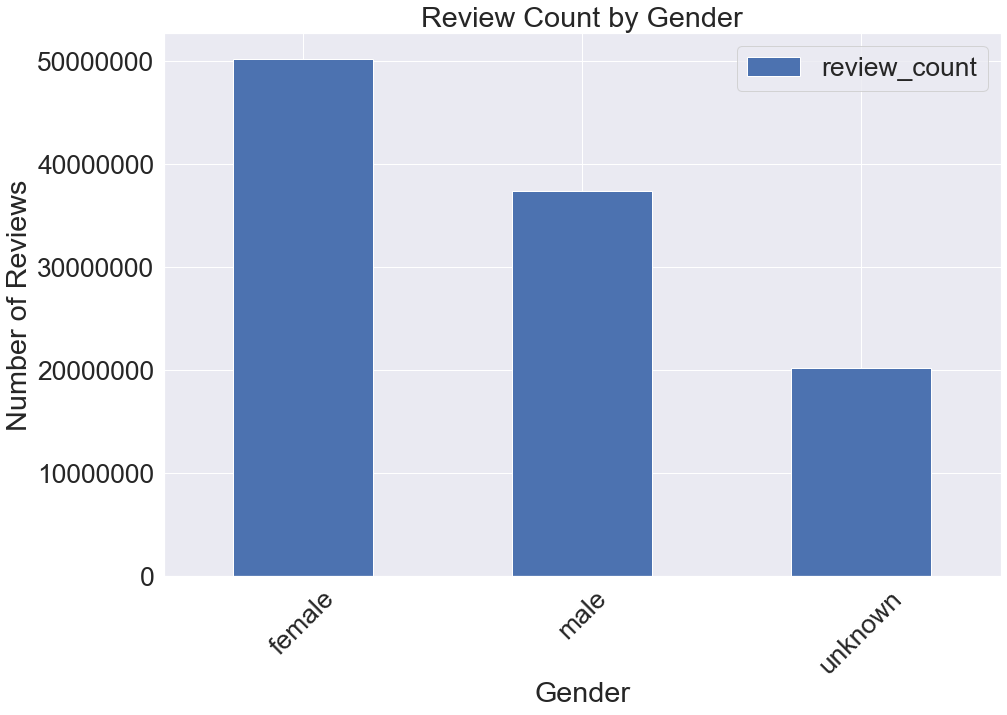

In [72]:
# plot review count by gender - including genre nulls
review_count1.plot(x = "gender", y = "review_count", kind = "bar", figsize=(15,10), title="Review Count by Gender")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Reviews')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

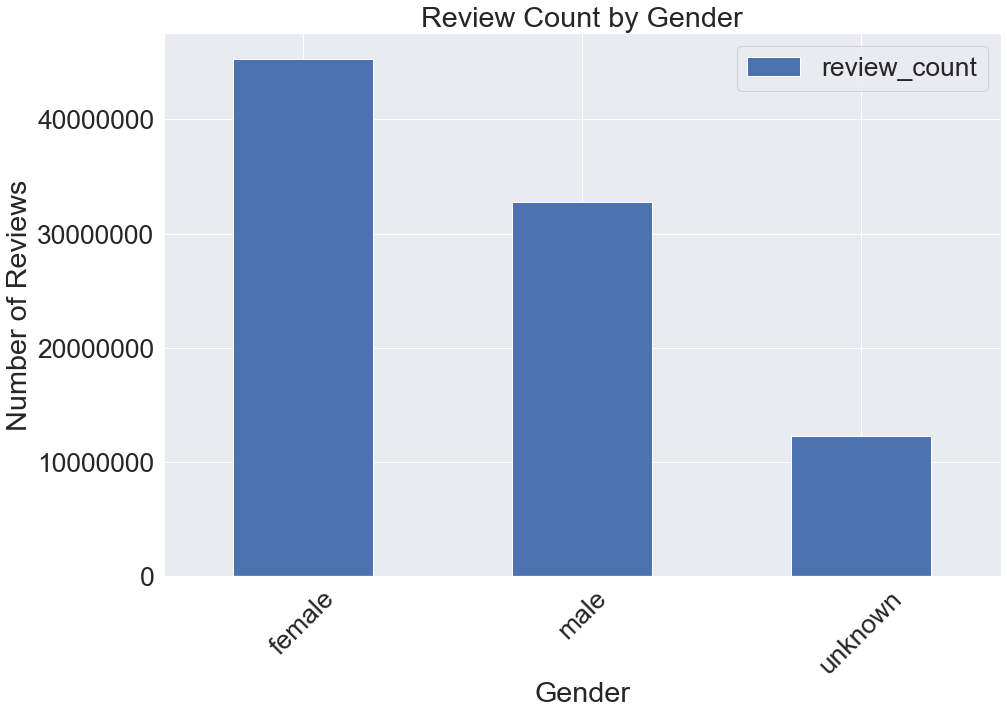

In [73]:
# plot review count by gender without genre nulls
review_count2.plot(x = "gender", y = "review_count", kind = "bar", figsize=(15,10), title="Review Count by Gender")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Reviews')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

In [74]:
# creates new dataframe grouping by gender and total fan count - with genre nulls
fan_count1 = pd.DataFrame(df1.groupby('gender')['fan_count'].sum().reset_index())
fan_count1

,gender,fan_count
0,female,17407479
1,male,11847717
2,unknown,5604701


In [75]:
# creates new dataframe grouping by gender and total fan count - without genre nulls
fan_count2 = pd.DataFrame(df2.groupby('gender')['fan_count'].sum().reset_index())
fan_count2

,gender,fan_count
0,female,15896588
1,male,10754712
2,unknown,4468593


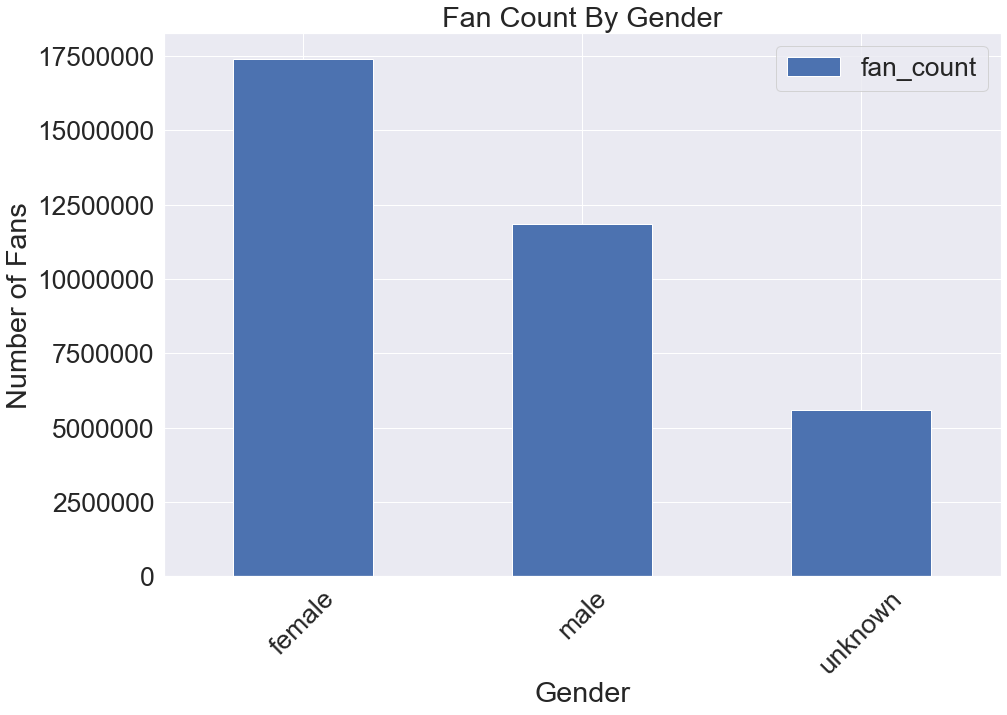

In [76]:
# plot fan count by gender - with genre nulls
fan_count1.plot(x = "gender", y = "fan_count", kind = "bar", figsize=(15,10), title="Fan Count By Gender")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Fans')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

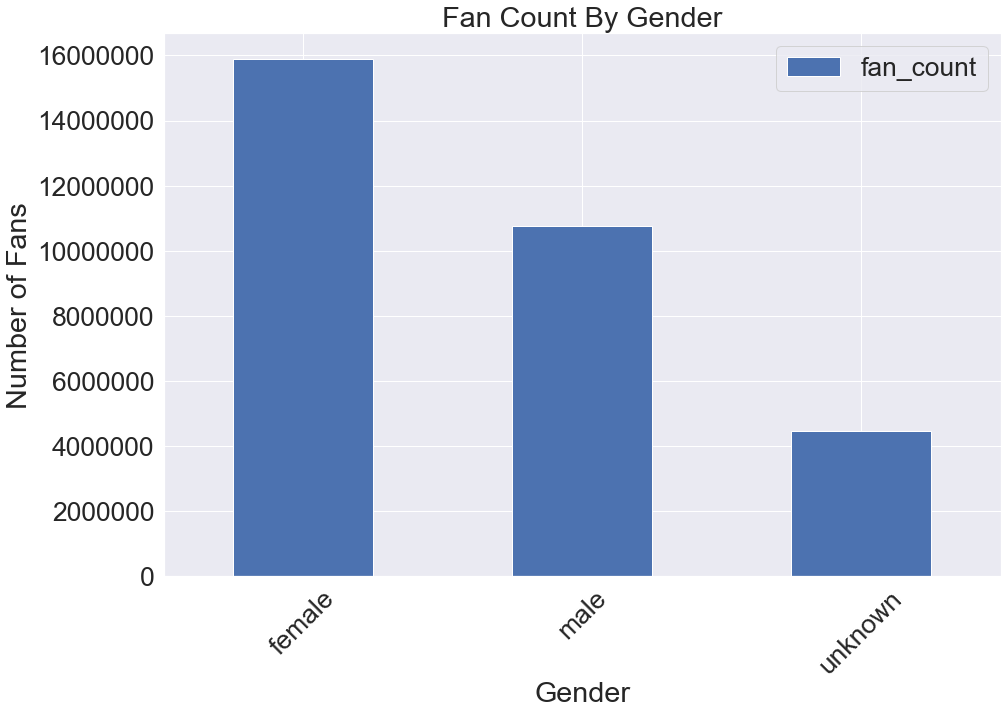

In [77]:
# plot fan count by gender - without genre nulls
fan_count2.plot(x = "gender", y = "fan_count", kind = "bar", figsize=(15,10), title="Fan Count By Gender")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Fans')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

In [78]:
# creates new dataframe grouped by gender and total work count - with genre nulls
work_count1 = pd.DataFrame(df1.groupby('gender')['workcount'].sum().reset_index())
work_count1

,gender,workcount
0,female,1045086
1,male,2147976
2,unknown,4270943


In [79]:
# creates new dataframe grouped by gender and total work count - without genre nulls
work_count2 = pd.DataFrame(df2.groupby('gender')['workcount'].sum().reset_index())
work_count2

,gender,workcount
0,female,853980
1,male,1574874
2,unknown,424529


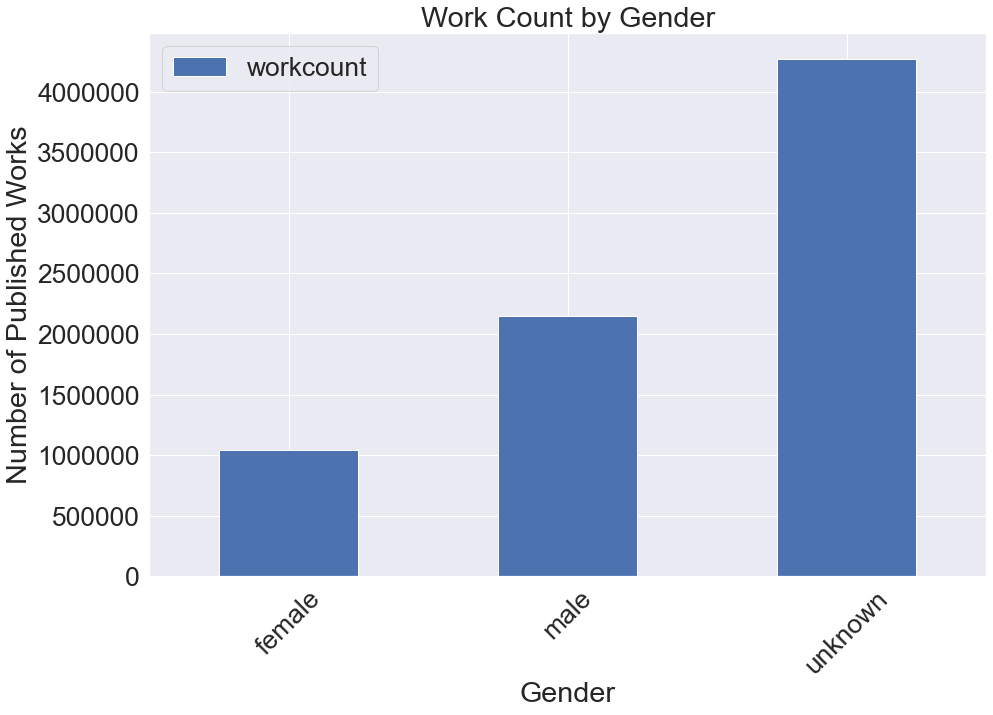

In [80]:
# plot work count by gender - with genre nulls
work_count1.plot(x = "gender", y = "workcount", kind = "bar", figsize=(15,10), title="Work Count by Gender")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Published Works')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

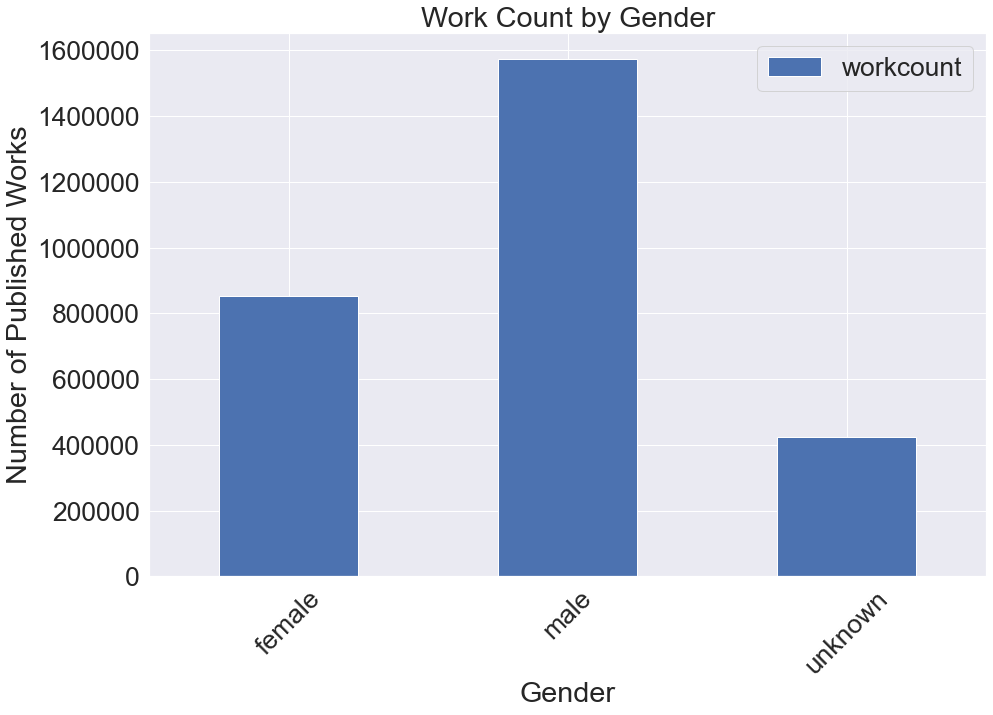

In [81]:
# plot work count by gender - with genre nulls
work_count2.plot(x = "gender", y = "workcount", kind = "bar", figsize=(15,10), title="Work Count by Gender")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Number of Published Works')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

In [82]:
# creates new dataframe that counts number of works per genre for females
female_genre_count = pd.DataFrame(df_female2['split_genres'].value_counts()).reset_index()
female_genre_count.head(30)

,index,split_genres
0,fiction,10514
1,fantasy,4157
2,contemporary,1860
3,romance,1497
4,mystery,1321
5,young adult,1228
6,children,1128
7,biographies,1058
8,history,1032
9,sex,941


In [83]:
female_genre_count[female_genre_count['index'].str.contains("science fiction")]

,index,split_genres
50,science fiction,14


In [84]:
# creates new dataframe that counts number of works per genre for males
male_genre_count = pd.DataFrame(df_male2['split_genres'].value_counts()).reset_index()
male_genre_count.head(10)

,index,split_genres
0,fiction,11692
1,fantasy,3483
2,history,1502
3,spirituality,1440
4,biographies,1395
5,mystery,997
6,philosophy,954
7,poetry,771
8,graphic novels,749
9,children,690


In [85]:
male_genre_count[male_genre_count['index'].str.contains("science fiction")]

,index,split_genres
74,science fiction,7


In [86]:
# creates new dataframe that counts number of works per genre for unknown gender
unknown_genre_count = pd.DataFrame(df_unknown2['split_genres'].value_counts()).reset_index()
unknown_genre_count.head(20)

,index,split_genres
0,fiction,4231
1,fantasy,1354
2,mystery,853
3,biographies,486
4,spirituality,454
5,contemporary,430
6,history,406
7,sex,365
8,romance,359
9,suspense,312


In [87]:
unknown_genre_count[unknown_genre_count['index'].str.contains("science fiction")]

,index,split_genres


#### Conclusion
- According to this data, women actually wrote double the number of science fiction. This is diminished by the data being created as a user conglomerate, though interesting. 

In [88]:
# descriptive statistics for female average rating - with genre nulls
female_stats1 = df_female1['average_rate'].describe()
female_stats1

count    41761.000000
mean         3.886882
std          0.326326
min          0.000000
25%          3.700000
50%          3.900000
75%          4.100000
max          5.000000
Name: average_rate, dtype: float64

In [89]:
# descriptive statistics for female average rating - without genre nulls
female_stats2 = df_female2['average_rate'].describe()
female_stats2

count    30636.000000
mean         3.900383
std          0.310400
min          0.000000
25%          3.717500
50%          3.910000
75%          4.100000
max          5.000000
Name: average_rate, dtype: float64

In [90]:
# descriptive statistics for male average rating - with genre nulls
male_stats1 = df_male1['average_rate'].describe()
male_stats1

count    46783.000000
mean         3.890911
std          0.326223
min          0.000000
25%          3.710000
50%          3.910000
75%          4.100000
max          5.000000
Name: average_rate, dtype: float64

In [91]:
# descriptive statistics for male average rating - without genre nulls
male_stats2 = df_male2['average_rate'].describe()
male_stats2

count    30956.000000
mean         3.907284
std          0.303118
min          0.000000
25%          3.730000
50%          3.920000
75%          4.100000
max          5.000000
Name: average_rate, dtype: float64

In [92]:
# descriptive statistics for unknown gender average rating - with genre nulls
unknown_stats1 = df_unknown1['average_rate'].describe()
unknown_stats1

count    120973.000000
mean          3.841719
std           0.534868
min           0.000000
25%           3.640000
50%           3.890000
75%           4.130000
max           8.070000
Name: average_rate, dtype: float64

In [93]:
# descriptive statistics for unknown gender average rating - with genre nulls
unknown_stats2 = df_unknown2['average_rate'].describe()
unknown_stats2

count    12391.000000
mean         3.930563
std          0.327250
min          0.000000
25%          3.730000
50%          3.940000
75%          4.140000
max          8.070000
Name: average_rate, dtype: float64

### Conclusion: 
- According to this dataset, the highest number of works (58%) are written by authors of unknown genders. This is due to nonbinary authors as well as those missing gender entries in their profiles. Males wrote 22% and females wrote 20%. 
- If we use the dataset that drops the null values in genre, which is the most beneficial for genre analysis, males wrote 42%, females wrote 41%, and unknown wrote 17%. 
- There appears to be a normal distribution in regards to average rating between all gender categories with and without the genre null values
- Females have a higher review and fan count despite men having more published works
- Men have a higher work count (except when using the dataframe that did not drop genre null values
- Men, women, and unknown all have a 3.8 average rating with genre nulls and 3.9 without

# Final Conclusions:
## Hypotheses/Questions:
### Men write more science fiction/fantasy than women.
- False. I find this very interesting as it is one of my favorite genres and I assumed men to be the primary contributors. Here is an interesting article on it:
    - https://www.wired.com/2019/02/geeks-guide-history-women-sci-fi/
    
### what genre do women contribute to the most?
- fantasy, mystery, contemporary, chidrens bookd, romance, sex, suspense and chick lit books

### Women have higher "follower" count
- True. I assumed this because while men contributed more works, women tend to read more books by women and support them by leaving more reviews and keeping up with the authors via becoming a 'fan' on Goodreads

### What genres have the most submissions?
- Top 20
    - fiction           26437
    - fantasy            8994
    - mystery            3171
    - history            2940
    - biographies        2939
    - spirituality       2526
    - contemporary       2484
    - children           2120
    - romance            1914
    - young adult        1743
    - sex                1555
    - suspense           1467
    - poetry             1245
    - philosophy         1228
    - graphic novels     1141
    - horror              915
    - crime               861
    - chick lit           812
    - psychology          694
    - art                 621
    
### Which genres have the highest ratings/number of reviews?
- Top 20 Average Ratings
    - pop punk	                4.860000
    - metaphysical	            4.720000
    - theonomy	                4.670000
    - objectivism	            4.345000
    - firearms	                4.325000
    - cross dressing	        4.290000
    - survivalism	            4.260000
    - international development	4.250000
    - nursing	                4.235000
    - current events	        4.230000
    - beer	                    4.220000
    - land reform	            4.210000
    - news	                    4.200000
    - style guide	            4.190000
    - self defense	            4.190000
    - horses	                4.180000
    - photography	            4.175833
    - domestic abuse	        4.170000
    - zoroastrianism	        4.145000
    - spirituality	            4.097937
- Top 20 Review Counts
    - fiction	        36443815
    - fantasy	        18965848
    - mystery	        4988633
    - contemporary	    3482044
    - young adult	    3287134
    - children	        2567303
    - romance	        2323639
    - graphic novels	2005191
    - suspense	        1863630
    - biographies	    1729650
    - history	        1653643
    - sex	            1613801
    - spirituality	    1208409
    - horror	        1085838
    - crime	            873758
    - chick lit	        868076
    - philosophy	    562000
    - comedy	        439009
    - poetry	        310632
    - psychology	    283842
    
### Do men or women authors receive higher ratings?
- Men, women, and unknown all have an average rating of 3.8 with genre nulls and 3.9 without

### Can books be classified by select words in the blurbs on the back?
- unknown. I Think this would require work outside of what I know how to do or could teach myself. Attempting to find genre key words in the descriptions might work, but not using this dataset as it is author data and not book data. 

### Section Conclusions:
#### Country
- from this data, the United States, United Kingdom, Canada, Australia, and France have the most published works
- Of the top 20 countries, only Canada, Australia and Japan have more works by female authors 
- The United States makes up 60% of the published works
- The United Kingdom makes up 18% of the published works
- Canada Makes Up 5% of the published works
- France and Germany each make up 4% of the published works

#### Genre
- Out of the top 20 genres in this dataset according to number of works, women tend to write more fantasy, mystery, contemporary, chidrens bookd, romance, sex, suspense and chick lit books. Science fiction did not make the top 20 according to work count. 
- Men wrote more fiction, history, biographies, spiritual books, poetry, philosophy, graphic novels, horror, crime, psychology and art. 
- The unknown section includes nonbinary authors as well as those that don't have that data filled in. 
- fiction and fantasy had by far the largest number of works, though neither fall into the top 20 rated category. This is most likely due to the larger number of entries and the likelyhood of readers taking the time to rate them. 
- This can be demonstrated in the fan count - these are people who consistently follow, are up to date with specific authors, and regularly review their work. 
- fiction has the highest number of works throughout the years sampled (top 20 based on number of works. Followd mostly by fantasy and then mystery with a couple outliers.

#### Author
- William Shakespear has the highest work count at over 5000. This value is most likely inflated due to translations into different languages being included. 
- Stephen King has the highest number of fans
- JK Rowling has the highest number of reviews

#### Gender
- According to this dataset, the highest number of works (58%) are written by authors of unknown genders. This is due to nonbinary authors as well as those missing gender entries in their profiles. Males wrote 22% and females wrote 20%. 
- If we use the dataset that drops the null values in genre, which is the most beneficial for genre analysis, males wrote 42%, females wrote 41%, and unknown wrote 17%. 
- There appears to be a normal distribution in regards to average rating between all gender categories with and without the genre null values
- Females have a higher review and fan count despite men having more published works
- Men have a higher work count (except when using the dataframe that did not drop genre null values
- Men, women, and unknown all have a 3.8 average rating with genre nulls and 3.9 without